In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
from TileEM_plot_toolbox import *
from qualityBaseline import *
from glob import glob

In [83]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()

In [171]:
from collections import OrderedDict
df = pd.read_csv("../computed_my_COCO_BBvals.csv",index_col=0)

In [201]:
cd ../../

/home/jlee782/crowd-seg/analysis/TileEM


In [381]:
for Nworker in sampleN_lst:
    for batch_num in range(worker_Nbatches[Nworker]):
        dir_name = "{0}worker_rand{1}".format(Nworker,batch_num)
        #print dir_name
        os.chdir("sample/"+dir_name)
         
        # Creating 2 empty precision recall table containing P,R for each metric used 
        cols = [u'Num Points',u'Area Ratio',u'Jaccard [Self]', u'Precision [Self]', u'Recall [Self]']

        PR_tbl = pd.DataFrame()#index=object_lst)#,columns=cols)
        PR_tbl["object_id"]=object_lst
        # Summarization-Based Method
        df.ix[df["Precision [Self]"]>1,"Precision [Self]"]=1
        df.ix[df["Recall [Self]"]>1,"Recall [Self]"]=1
        df = df[~(df["worker_id"].isin([1,2,3]))] #Filter our ground truth workers
        for attr in cols:
            tbl=[]
            for objid in object_lst:
                workers=pkl.load(open("worker{}.pkl".format(objid)))
                filtered_df = df[(df["worker_id"].isin(workers))&(df["object_id"]==objid)] #only look at summarization scores of sampled workers
                best_worker_BB = filtered_df[filtered_df[attr]==filtered_df[attr].max()]
                tbl.append([objid,best_worker_BB["Precision [Self]"].values[0],best_worker_BB["Recall [Self]"].values[0]])
            tmp_PR_tbl = pd.DataFrame(tbl,columns=["object_id","Precision","Recall"])
            PR_tbl["P [{}]".format(attr)]=tmp_PR_tbl["Precision"]
            PR_tbl["R [{}]".format(attr)]=tmp_PR_tbl["Recall"]
        # Vision based methods 
        for threshold in [10,50,90]:
            visionPR = pd.read_csv("../../../PR{}.csv".format(threshold))
            PR_tbl["P [Vision{}%]".format(threshold)] = visionPR["precision"]
            PR_tbl["R [Vision{}%]".format(threshold)] = visionPR["recall"]
        #MVT, Tile
        tbl=[]
        for fname in glob("Tstar_idx_obj*.pkl"):
            objid=int(fname.split("_")[-1].split(".")[0][3:])
            tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
            #Tile EM
            Tstar_lst = pkl.load(open("Tstar_idx_obj{}.pkl".format(objid)))
            TileEMP,TileEMR=compute_PR(objid,np.array(Tstar_lst[-1]),tiles)
            # Majority Vote 
            PMVT,RMVT = majority_vote(objid,heuristic="50%")
            PMVTtopk,RMVTtopk = majority_vote(objid,heuristic="topk")
            PMVTtopP,RMVTtopP = majority_vote(objid,heuristic="topPercentile")
            tbl.append([objid,TileEMP,TileEMR,PMVT,RMVT,PMVTtopk,RMVTtopk,PMVTtopP,RMVTtopP])
        Tile_df = pd.DataFrame(tbl,columns=["object_id","P [TileEM]","R [TileEM]","P [MVT]","R [MVT]","P [MVTtop10]","R [MVTtop10]","P [MVTtop95%]","R [MVTtop95%]"])
        PR_tbl_all = PR_tbl.merge(Tile_df,on="object_id")
        #Save to file in that folder 
        PR_tbl_all.to_csv("PR_tbl_all.csv")
        os.chdir("../..")

TopologyException: side location conflict at 447 175
TopologyException: side location conflict at 461 219
TopologyException: found non-noded intersection between LINESTRING (398.6 163.8, 398.087 159.696) and LINESTRING (398.087 159.696, 398.812 171.055) at 398.08695652173913 159.69565217391317
TopologyException: found non-noded intersection between LINESTRING (373 126, 372.353 127.294) and LINESTRING (372.353 127.294, 376.667 126) at 372.35294117647061 127.29411764705883
Self-intersection at or near point 372.35294117647061 127.29411764705884
TopologyException: found non-noded intersection between LINESTRING (398.6 163.8, 398.087 159.696) and LINESTRING (398.087 159.696, 398.812 171.055) at 398.08695652173913 159.69565217391317
TopologyException: found non-noded intersection between LINESTRING (169.863 171.003, 170.721 171.465) and LINESTRING (175 172, 170.721 171.465) at 170.72093023255812 171.46511627906975
TopologyException: found non-noded intersection between LINESTRING (169.863 1

Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310

TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310

Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.388349

TopologyException: found non-noded intersection between LINESTRING (420.488 179.349, 421 186) and LINESTRING (423 185, 420.488 179.349) at 420.48837209302326 179.34883720930225
TopologyException: found non-noded intersection between LINESTRING (416 190, 420.735 186.618) and LINESTRING (416.515 196.465, 420.735 186.618) at 420.73529411764707 186.61764705882356
Self-intersection at or near point 420.44184064296576 178.74392835855451
TopologyException: found non-noded intersection between LINESTRING (416 190, 420.735 186.618) and LINESTRING (416.515 196.465, 420.735 186.618) at 420.73529411764707 186.61764705882356
Self-intersection at or near point 420.44184064296576 178.74392835855451
TopologyException: found non-noded intersection between LINESTRING (416 190, 420.735 186.618) and LINESTRING (416.515 196.465, 420.735 186.618) at 420.73529411764707 186.61764705882356
Self-intersection at or near point 420.44184064296576 178.74392835855451
TopologyException: found non-noded intersection b

TopologyException: found non-noded intersection between LINESTRING (383.25 477.57, 417.189 477.013) and LINESTRING (390.612 477.449, 380.012 477.623) at 383.52174043587462 477.56521736990368
TopologyException: found non-noded intersection between LINESTRING (392.229 375.857, 388.963 374.138) and LINESTRING (392.229 375.857, 385.714 372.429) at 388.98697916666703 374.15104166666686
TopologyException: found non-noded intersection between LINESTRING (355.154 472.692, 354.621 471.448) and LINESTRING (355.154 472.692, 355.154 472.692) at 355.15384615384596 472.69230769230711
TopologyException: found non-noded intersection between LINESTRING (124.273 145.727, 122.161 146.548) and LINESTRING (124 146, 123.571 146) at 123.5714285714286 146
TopologyException: no outgoing dirEdge found at 138.02702702702703 140.37837837837839
TopologyException: found non-noded intersection between LINESTRING (123.571 146, 124.333 145.704) and LINESTRING (124.333 145.704, 124.273 145.727) at 124.29879732943118 14

TopologyException: found non-noded intersection between LINESTRING (251.235 515.207, 269 511) and LINESTRING (350 436, 251.235 515.207) at 251.2351313969572 515.207468879668
Self-intersection at or near point 251.23513139695709 515.207468879668
TopologyException: found non-noded intersection between LINESTRING (249 517, 251.235 515.207) and LINESTRING (251.235 515.207, 242.4 517.3) at 251.23513139695703 515.207468879668
TopologyException: found non-noded intersection between LINESTRING (636.077 254.535, 637 245) and LINESTRING (636.046 254.593, 637.272 252.338) at 636.07721518987341 254.53544303797463
Self-intersection at or near point 628.62500000000011 407.37499999999994
TopologyException: found non-noded intersection between LINESTRING (631.8 404.2, 628.625 407.375) and LINESTRING (630 405, 628.625 407.375) at 628.62500000000011 407.37499999999994
Self-intersection at or near point 628.62500000000011 407.37499999999994
TopologyException: found non-noded intersection between LINESTRI

TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (366.298 54.4894, 367.407 55.6914) and LINESTRING (367.407 55.6914, 366.298 54.4894) at 366.44396112424482 54.647624551265189
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: f

TopologyException: side location conflict at 63 389
TopologyException: found non-noded intersection between LINESTRING (136.645 380.476, 132.672 381.872) and LINESTRING (136 380, 132.672 381.872) at 132.67200000000003 381.87200000000001
TopologyException: found non-noded intersection between LINESTRING (31.2143 265.429, 30 297) and LINESTRING (30.9225 273.016, 30.7672 274.549) at 30.922480620155039 273.01550387596899
TopologyException: found non-noded intersection between LINESTRING (127.847 190.727, 127.879 190.867) and LINESTRING (127.885 190.893, 127.835 190.672) at 127.87080709042064 190.83155119785081
TopologyException: side location conflict at 30.33430232558139 362.0988372093023
TopologyException: found non-noded intersection between LINESTRING (106.057 128.629, 108.571 128.786) and LINESTRING (108.571 128.786, 107.327 128.164) at 108.57142857142858 128.78571428571431
TopologyException: found non-noded intersection between LINESTRING (71.7021 151.043, 71.8 153) and LINESTRING (7

TopologyException: found non-noded intersection between LINESTRING (268.464 502.179, 267.101 497.544) and LINESTRING (268.464 502.179, 266.861 497.726) at 268.46428571371609 502.17857142698932
TopologyException: found non-noded intersection between LINESTRING (22 336, 14.1429 347) and LINESTRING (27 327, 14.1429 347) at 14.142857142857363 346.99999999999966
TopologyException: side location conflict at 100 107
TopologyException: found non-noded intersection between LINESTRING (348.108 273.162, 348.108 273.162) and LINESTRING (348.108 273.162, 349 269) at 348.10810810810813 273.16216216216213
TopologyException: found non-noded intersection between LINESTRING (186.632 75.7368, 158.412 78.5588) and LINESTRING (158.412 78.5588, 187.073 75.6927) at 184.24680899791818 75.975319100208196
TopologyException: found non-noded intersection between LINESTRING (22 336, 14.1429 347) and LINESTRING (14.1429 347, 27 327) at 14.142857142857363 346.99999999999966
TopologyException: found non-noded interse

TopologyException: found non-noded intersection between LINESTRING (1.06041 362.158, 1.01177 378.94) and LINESTRING (1.01177 378.94, 0.00581594 379) at 1.0117667121418825 378.94048431105045
TopologyException: found non-noded intersection between LINESTRING (166.1 199.611, 170.95 199.687) and LINESTRING (130.77 199.059, 178.861 199.81) at 167.0810925128053 199.62626707051257
TopologyException: side location conflict at 171.5 160
TopologyException: found non-noded intersection between LINESTRING (177 473.714, 175 472) and LINESTRING (167 468, 177 473.714) at 176.99999999999991 473.71428571428567
TopologyException: found non-noded intersection between LINESTRING (177 473.714, 175 472) and LINESTRING (167 468, 177 473.714) at 176.99999999999991 473.71428571428567
TopologyException: found non-noded intersection between LINESTRING (153.5 465, 151.973 465.436) and LINESTRING (152.386 465.318, 151.423 465.19) at 152.38636363636363 465.31818181818181
TopologyException: found non-noded intersect

TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.076923

TopologyException: side location conflict at 295 302
TopologyException: found non-noded intersection between LINESTRING (356.902 325.875, 356.902 325.875) and LINESTRING (356.902 325.875, 356.902 325.875) at 356.90207715133533 325.87537091988133
TopologyException: found non-noded intersection between LINESTRING (356.902 325.875, 356.902 325.875) and LINESTRING (356.902 325.875, 356.902 325.875) at 356.90207715133533 325.87537091988133
TopologyException: found non-noded intersection between LINESTRING (275.086 258.343, 274.571 259.286) and LINESTRING (274.571 259.286, 275.528 257.532) at 274.645069601621 259.15070573036149
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.4

Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection betw

Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection between LINESTRING (363.5 192.5, 365 187) and LINESTRING (364.833 180.5, 363.5 192.5) at 363.5 192.49999999999991
Self-intersection at or near point 363.5 192.49999999999991
TopologyException: found non-noded intersection betw

Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.13824884792626 234.7557603686636
Self-intersection at or near point 398.13824884792626 234.7557603686636
TopologyException: found non-noded intersection between LINESTRING (409.802 227.13, 396.406 235.888) and LINESTRING (398.138 234.756, 413 230) at 398.1382488479262

TopologyException: found non-noded intersection between LINESTRING (229.023 338.281, 229.023 338.281) and LINESTRING (282.869 336.072, 229.023 338.281) at 229.02304147465432 338.28110599078343
TopologyException: found non-noded intersection between LINESTRING (117.688 341.563, 117.688 341.563) and LINESTRING (117.688 341.563, 117.688 341.563) at 117.6875000000001 341.56250000000006
TopologyException: found non-noded intersection between LINESTRING (124.217 174.342, 125.1 173.795) and LINESTRING (123.975 174.492, 124.769 174) at 124.3564650548072 174.25552163273841
TopologyException: found non-noded intersection between LINESTRING (309.882 263.989, 309.202 318.754) and LINESTRING (309.202 318.754, 310.852 313.472) at 309.20181112548511 318.75420439844754
TopologyException: side location conflict at 105.686220642103 262.28740214034332
TopologyException: found non-noded intersection between LINESTRING (105.211 260.704, 105.34 261.132) and LINESTRING (105.327 261.09, 105.261 260.87) at 105

TopologyException: found non-noded intersection between LINESTRING (113.778 357.222, 109.715 344.664) and LINESTRING (113.778 357.222, 117.333 369.667) at 113.77777777777779 357.22222222222229
TopologyException: found non-noded intersection between LINESTRING (107.969 339.2, 107.875 338.977) and LINESTRING (107.875 338.977, 108.888 342.109) at 107.87500000000003 338.97727272727286
TopologyException: no outgoing dirEdge found at 36 172
TopologyException: found non-noded intersection between LINESTRING (1.98746 204.701, 7 267) and LINESTRING (1.98746 204.701, 2.89535 178.07) at 1.9874572405929307 204.7012542759407
TopologyException: found non-noded intersection between LINESTRING (132.382 427.882, 132.388 427.905) and LINESTRING (132.386 427.9, 132.382 427.882) at 132.38488787793315 427.89350666290591
TopologyException: found non-noded intersection between LINESTRING (91.5149 294.713, 91.5149 294.713) and LINESTRING (83 273, 91.5149 294.713) at 91.514851485148498 294.71287128712868
Topol

TopologyException: found non-noded intersection between LINESTRING (131.923 125.364, 144.799 123.276) and LINESTRING (142.358 123.672, 131.923 125.364) at 138.70462043040291 124.2641156058806
TopologyException: side location conflict at 121.39999999999998 75.900000000000006
TopologyException: found non-noded intersection between LINESTRING (59.6364 75.4545, 57.9048 74.4444) and LINESTRING (60.7059 77.0588, 57.9048 74.4444) at 57.904761904761934 74.444444444444471
TopologyException: found non-noded intersection between LINESTRING (103 55, 103.176 56.2687) and LINESTRING (103.176 56.2687, 102.457 55.7547) at 103.17621145374449 56.268722466960348
TopologyException: found non-noded intersection between LINESTRING (28.2867 345.804, 29 359) and LINESTRING (31.2028 364.35, 28.4079 348.046) at 28.407894736842106 348.04605263157896
TopologyException: found non-noded intersection between LINESTRING (28.2867 345.804, 29 359) and LINESTRING (31.2028 364.35, 28.4079 348.046) at 28.407894736842106 3

Self-intersection at or near point 419.84816753926702 296.72251308900519
TopologyException: found non-noded intersection between LINESTRING (421.646 248.828, 421.678 248.771) and LINESTRING (421.111 251.889, 421.678 248.771) at 421.67796610169489 248.77118644067801
TopologyException: found non-noded intersection between LINESTRING (576 383, 571.426 386.327) and LINESTRING (571.426 386.327, 575.711 383.211) at 575.36146728046219 383.46438743239111
TopologyException: found non-noded intersection between LINESTRING (576 383, 571.426 386.327) and LINESTRING (571.426 386.327, 575.711 383.211) at 575.36146728046219 383.46438743239111
TopologyException: found non-noded intersection between LINESTRING (418.291 267.994, 421.164 258.047) and LINESTRING (419.983 262.136, 418.688 272.5) at 419.9830508474576 262.13559322033927
TopologyException: found non-noded intersection between LINESTRING (576 383, 571.426 386.327) and LINESTRING (571.426 386.327, 575.711 383.211) at 575.36146728046219 383.4643

TopologyException: found non-noded intersection between LINESTRING (489.989 301.782, 489.974 302.136) and LINESTRING (489.974 302.136, 489.98 301.984) at 489.97481572119227 302.1170148307898
TopologyException: found non-noded intersection between LINESTRING (463.515 326.708, 485.4 326.1) and LINESTRING (463.515 326.708, 476.226 326.355) at 468.64251070933494 326.56548581362961
TopologyException: found non-noded intersection between LINESTRING (489.989 301.782, 489.989 301.782) and LINESTRING (489.989 301.782, 489.989 301.782) at 489.98850574712645 301.7816091954025
TopologyException: found non-noded intersection between LINESTRING (463.515 326.708, 485.4 326.1) and LINESTRING (463.515 326.708, 476.226 326.355) at 468.64251070933494 326.56548581362961
TopologyException: found non-noded intersection between LINESTRING (293.604 310.584, 293.5 311) and LINESTRING (294.893 302.643, 293.5 311) at 293.50000000000017 310.99999999999932
TopologyException: side location conflict at 362.691358024

TopologyException: found non-noded intersection between LINESTRING (349 154, 356.138 148.414) and LINESTRING (356.138 148.414, 344 156) at 356.13793103448245 148.41379310344843
TopologyException: found non-noded intersection between LINESTRING (502.56 168.8, 500 164) and LINESTRING (497.333 161.333, 502.56 168.8) at 502.55999999999995 168.79999999999993
TopologyException: found non-noded intersection between LINESTRING (489.379 149.032, 490 154) and LINESTRING (489.379 149.032, 491 151) at 489.37894736842105 149.03157894736847
TopologyException: found non-noded intersection between LINESTRING (489.379 149.032, 489.167 147.333) and LINESTRING (478.093 135.327, 489.379 149.032) at 489.37894736842105 149.03157894736844
TopologyException: found non-noded intersection between LINESTRING (500 164, 495.4 159.4) and LINESTRING (490 154, 495.4 159.4) at 495.39999999999992 159.39999999999998
TopologyException: found non-noded intersection between LINESTRING (502.56 168.8, 500 164) and LINESTRING

TopologyException: found non-noded intersection between LINESTRING (187.451 165.478, 178.966 161.621) and LINESTRING (178.966 161.621, 190.197 168.841) at 178.96551724137939 161.62068965517247
Self-intersection at or near point 187.45095124851369 165.47770511296076
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 158.66666666666634 171.7777777777778
TopologyException: side location conflict at 158.66666666666634 171.7777777777778
Self-intersection at or near point 1

TopologyException: found non-noded intersection between LINESTRING (391.025 362.723, 391.038 362.722) and LINESTRING (391.025 362.723, 393.4 361.8) at 391.02547637896708 362.72341266985347
TopologyException: Directed Edge visited twice during ring-building at 410.53613053613111 391.61072261072223
TopologyException: found non-noded intersection between LINESTRING (630 394.118, 622.276 382.759) and LINESTRING (622.276 382.759, 624 385) at 622.27586206896626 382.75862068965614
TopologyException: found non-noded intersection between LINESTRING (2.50416 223.13, 2.71002 229.58) and LINESTRING (0 220, 19.7222 289.722) at 2.7100152001351119 229.58047627090019
TopologyException: found non-noded intersection between LINESTRING (19.7222 289.722, 19.7222 289.722) and LINESTRING (19.7222 289.722, 19.7222 289.722) at 19.722222222166465 289.72222222202504
TopologyException: found non-noded intersection between LINESTRING (93.1495 440.712, 93.1495 440.712) and LINESTRING (93.1495 440.712, 98.1756 447.

Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: side location conflict at 228.92307692307691 124.46153846153848
Self-intersection at or near point 228.92307692307691 124.46153846153848
TopologyException: found non-noded intersection between LINESTRING (366.843 173.587, 366.333 169) and LINESTRING (366.333 169, 367.098 175.88) at 3

TopologyException: found non-noded intersection between LINESTRING (116.993 390.927, 141 378) and LINESTRING (117.296 390.764, 120.6 389.8) at 117.29615930202219 390.76360652968037
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: found non-noded intersection between LINESTRING (152.301 311.785, 160.733 343.98) and LINESTRING (154.84 316.44, 152.301 311.785) at 152.30076885161282 311.78475379706703
TopologyException: found non-noded intersection between LINESTRING (116.993 390.927, 141 378) and LINESTRING (117.296 390.764, 120.6 389.8) at 117.29615930202219 390.76360652968037
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: found non-noded intersection between LINESTRING (271.525 385.966, 254 380) and LINESTRING (258.977 382.955, 271.525 385.966) at 271.52542372881305 385.9661016949151
TopologyException: found non-noded intersection between L

TopologyException: found non-noded intersection between LINESTRING (218.038 547.077, 245.317 594.611) and LINESTRING (245.317 594.611, 218.038 547.077) at 245.30825447576166 594.59656225479273
TopologyException: found non-noded intersection between LINESTRING (159.228 353.935, 162.716 361.809) and LINESTRING (162.716 361.809, 148.182 331.364) at 162.71550255394391 361.8091993153572
TopologyException: found non-noded intersection between LINESTRING (186.529 487.46, 186.529 487.46) and LINESTRING (186.529 487.46, 182.107 479.272) at 186.52857142857124 487.46031746031713
TopologyException: found non-noded intersection between LINESTRING (1.09066 193.147, 1.07761 193.701) and LINESTRING (14.8696 215.478, 1.09066 193.147) at 1.0906604142243068 193.14693239546699
TopologyException: found non-noded intersection between LINESTRING (1.09066 193.147, 1.07761 193.701) and LINESTRING (14.8696 215.478, 1.09066 193.147) at 1.0906604142243068 193.14693239546699
TopologyException: found non-noded inte

TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.526315789

Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.5263157894737 360.63157894736833
Self-intersection at or near point 294.5263157894737 360.63157894736827
TopologyException: found non-noded intersection between LINESTRING (294.353 363.059, 294.526 360.632) and LINESTRING (294.526 360.632, 294 363) at 294.526315789

Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03560830860536 609.14540059347178
Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03560830860536 609.14540059347178
Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03560830860536 609.14540059347178
Self-intersection at or near point 253.03560830860536 609.14540059347178
TopologyException: found non-noded intersection between LINESTRING (253.036 609.145, 254 611) and LINESTRING (259.709 609.622, 253.036 609.145) at 253.03

TopologyException: found non-noded intersection between LINESTRING (91 370, 91 376.5) and LINESTRING (91.7143 349.286, 90.4378 386.304) at 91 370.00000000000034
TopologyException: found non-noded intersection between LINESTRING (125.068 446.653, 130.992 438.261) and LINESTRING (130.864 438.443, 125.068 446.653) at 128.95131916018732 441.15229785640128
TopologyException: found non-noded intersection between LINESTRING (478 162, 480.579 157.947) and LINESTRING (480.579 157.947, 478.509 161.2) at 479.68211557877174 159.35667551907292
TopologyException: found non-noded intersection between LINESTRING (484.368 149.421, 484.368 149.421) and LINESTRING (484.368 149.421, 484.412 149.114) at 484.36842105263156 149.4210526315789
TopologyException: found non-noded intersection between LINESTRING (484 152, 484.368 149.421) and LINESTRING (484.368 149.421, 483.95 150.362) at 484.36842105263156 149.42105263157899
TopologyException: found non-noded intersection between LINESTRING (484 152, 484.368 14

TopologyException: found non-noded intersection between LINESTRING (410 169, 418.517 174.897) and LINESTRING (418.517 174.897, 418.29 174.065) at 418.51724137931035 174.89655172413794
TopologyException: found non-noded intersection between LINESTRING (418.29 174.065, 418 173) and LINESTRING (418.29 174.065, 414.927 167.524) at 418.29032258064512 174.06451612903214
Self-intersection at or near point 418.29032258064512 174.06451612903214
TopologyException: found non-noded intersection between LINESTRING (486.441 215.391, 493.75 220.375) and LINESTRING (493.75 220.375, 486.648 215.246) at 493.74999999999915 220.3749999999994
TopologyException: side location conflict at 502.37500000000011 167.85714285714306
TopologyException: side location conflict at 288 206
TopologyException: found non-noded intersection between LINESTRING (479.975 227.275, 511.071 236.046) and LINESTRING (511.071 236.046, 511.071 236.046) at 511.07106598984768 236.04568527918781
TopologyException: side location conflict

Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569 333.72774869110003
Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569 333.72774869110003
Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569 333.72774869110003
Self-intersection at or near point 313.54973821989569 333.72774869110003
TopologyException: found non-noded intersection between LINESTRING (345.13 384.435, 313.55 333.728) and LINESTRING (320 343, 313.55 333.728) at 313.54973821989569

TopologyException: found non-noded intersection between LINESTRING (395.141 125.499, 393.115 124.712) and LINESTRING (393.706 124.941, 396.149 125.891) at 394.1613859383566 125.11831675380535
TopologyException: found non-noded intersection between LINESTRING (370.935 126.733, 370.413 140.546) and LINESTRING (370.747 131.692, 370 133) at 370.74747474747477 131.69191919191917
TopologyException: found non-noded intersection between LINESTRING (372 177, 378.545 177.364) and LINESTRING (378.545 177.364, 380.364 177.242) at 378.54545454545439 177.36363636363635
TopologyException: found non-noded intersection between LINESTRING (370.935 126.733, 370.413 140.546) and LINESTRING (370.747 131.692, 370 133) at 370.74747474747477 131.69191919191917
TopologyException: found non-noded intersection between LINESTRING (347.744 225.837, 355.372 224.522) and LINESTRING (355.472 224.505, 352.424 225.03) at 353.26972339495279 224.8845304491461
TopologyException: found non-noded intersection between LINEST

TopologyException: found non-noded intersection between LINESTRING (607.222 328.667, 606.852 329.889) and LINESTRING (604.911 337.502, 607.465 327.484) at 606.85175557075149 329.88920661652008
TopologyException: found non-noded intersection between LINESTRING (421 250, 427.011 239.105) and LINESTRING (427.011 239.105, 421.185 259.079) at 427.01104972375697 239.10497237569055
TopologyException: found non-noded intersection between LINESTRING (432.967 221.237, 433.771 219.808) and LINESTRING (433.771 219.808, 433.771 219.808) at 433.77051852303885 219.80792944766625
TopologyException: found non-noded intersection between LINESTRING (611 294.12, 609.646 288.432) and LINESTRING (610.096 290.325, 610.675 292.754) at 610.62931776627204 292.5632785717288
TopologyException: found non-noded intersection between LINESTRING (432.967 221.237, 433.771 219.808) and LINESTRING (433.771 219.808, 433.771 219.808) at 433.77051852303885 219.80792944766625
TopologyException: found non-noded intersection b

Self-intersection at or near point 267.45454545454544 375.27272727272725
TopologyException: found non-noded intersection between LINESTRING (495.462 254.077, 495.714 253.571) and LINESTRING (495.714 253.571, 499.538 241.462) at 495.71428571428572 253.57142857142856
TopologyException: side location conflict at 542 203
TopologyException: found non-noded intersection between LINESTRING (499.538 241.462, 495.425 254.486) and LINESTRING (495.462 254.077, 495.714 253.571) at 495.71428571428567 253.57142857142861
TopologyException: found non-noded intersection between LINESTRING (499.538 241.462, 495.714 253.571) and LINESTRING (495.714 253.571, 495.714 253.571) at 495.71428571428567 253.57142857142867
TopologyException: found non-noded intersection between LINESTRING (553.5 322.5, 553.889 326) and LINESTRING (553.769 323.846, 553.889 326) at 553.88888888888891 326.00000000000023
TopologyException: found non-noded intersection between LINESTRING (540.615 196.769, 540.615 196.769) and LINESTRI

TopologyException: side location conflict at 96.257083651087626 431.12854182554378
TopologyException: found non-noded intersection between LINESTRING (110 419, 108.333 421.667) and LINESTRING (110 420, 108.333 421.667) at 108.3333333333334 421.66666666666657
TopologyException: found non-noded intersection between LINESTRING (155.435 359.957, 155.435 359.957) and LINESTRING (155.435 359.957, 155.435 359.957) at 155.4347826086958 359.95652173913038
Self-intersection at or near point 155.43478260869574 359.95652173913038
TopologyException: found non-noded intersection between LINESTRING (155.435 359.957, 155.435 359.957) and LINESTRING (155.435 359.957, 155.435 359.957) at 155.4347826086958 359.95652173913038
Self-intersection at or near point 155.43478260869574 359.95652173913038
TopologyException: found non-noded intersection between LINESTRING (153.609 360.739, 152.892 360.811) and LINESTRING (152.892 360.811, 153.199 360.731) at 152.89189189189199 360.81081081081084
Self-intersection 

TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310

Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310 154.99999999999994
Self-intersection at or near point 310 154.99999999999994
TopologyException: found non-noded intersection between LINESTRING (312 151, 310 155) and LINESTRING (318 147, 310 155) at 310

TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.388349

TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.38834951456312 211.69902912621365
TopologyException: found non-noded intersection between LINESTRING (367.388 211.699, 368 217) and LINESTRING (367.388 211.699, 368.739 214.13) at 367.38834951456312 211.69902912621365
Self-intersection at or near point 367.388349

TopologyException: found non-noded intersection between LINESTRING (248 229, 256.516 223.937) and LINESTRING (256.754 222.986, 256 226) at 256.51587301587301 223.93650793650792
TopologyException: found non-noded intersection between LINESTRING (257.8 218.8, 257.8 218.8) and LINESTRING (257.8 218.8, 257.8 218.8) at 257.80000000000001 218.8000000000001
TopologyException: no outgoing dirEdge found at 185 285
TopologyException: found non-noded intersection between LINESTRING (382.099 249.485, 382.099 249.485) and LINESTRING (382.099 249.485, 382.099 249.485) at 382.0990099009901 249.48514851485149
TopologyException: found non-noded intersection between LINESTRING (382.099 249.485, 382.099 249.485) and LINESTRING (382.099 249.485, 381.917 246.75) at 382.0990099009901 249.48514851485149
TopologyException: found non-noded intersection between LINESTRING (355 197, 359.211 202.333) and LINESTRING (354 195, 359.211 202.333) at 359.21052631578925 202.33333333333309
TopologyException: found non-no

TopologyException: found non-noded intersection between LINESTRING (111 355, 109.133 280.333) and LINESTRING (109.2 283, 110 295) at 109.2 283.00000000000011
TopologyException: side location conflict at 66.308036971830987 352.00448063380276
TopologyException: EdgeRing::computePoints: found null Directed Edge
Self-intersection at or near point 109.0204081632653 275.81632653061229
TopologyException: side location conflict at 66.308036971830987 352.00448063380276
TopologyException: found non-noded intersection between LINESTRING (110 315, 110.308 327.308) and LINESTRING (110.308 327.308, 110 323) at 110.30769230769231 327.30769230769221
Self-intersection at or near point 109.0204081632653 275.81632653061229
TopologyException: found non-noded intersection between LINESTRING (477.5 176.75, 483.597 176.473) and LINESTRING (489 177, 483.597 176.473) at 483.59689922480612 176.47286821705427
TopologyException: found non-noded intersection between LINESTRING (287.22 108.73, 263.413 110.506) and 

TopologyException: found non-noded intersection between LINESTRING (4.5 274, 3.93814 272.876) and LINESTRING (3.93814 272.876, 3.93814 272.876) at 3.9381443298969145 272.87628865979383
TopologyException: found non-noded intersection between LINESTRING (128.622 412.302, 129 421) and LINESTRING (128.745 412.72, 128.622 412.302) at 128.6218097447796 412.30162412993047
TopologyException: found non-noded intersection between LINESTRING (128.622 412.302, 129 421) and LINESTRING (128.745 412.72, 128.622 412.302) at 128.6218097447796 412.30162412993047
TopologyException: found non-noded intersection between LINESTRING (82.8095 251.286, 80.0535 240.951) and LINESTRING (79.7035 239.638, 82.8095 251.286) at 81.324016563146998 245.71506211180122
TopologyException: side location conflict at 145 474
TopologyException: found non-noded intersection between LINESTRING (225.339 529.661, 222.131 498.458) and LINESTRING (222.552 502.55, 225.339 529.661) at 223.5491746779997 512.25106277690622
TopologyExce

TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection between LINESTRING (357 85, 360.4 78.2) and LINESTRING (368 63, 360.4 78.2) at 360.40000000000003 78.199999999999918
Self-intersection at or near point 360.40000000000003 78.199999999999889
TopologyException: found non-noded intersection 

Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67857142857144 252.89285714285705
Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67857142857144 252.89285714285705
Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67857142857144 252.89285714285705
Self-intersection at or near point 421.67857142857144 252.89285714285725
TopologyException: found non-noded intersection between LINESTRING (422 250, 421.679 252.893) and LINESTRING (421.679 252.893, 423.565 246.478) at 421.67

TopologyException: found non-noded intersection between LINESTRING (38.1873 253.269, 26.8787 234.941) and LINESTRING (27.5303 235.997, 37.0704 251.459) at 29.672961978598558 239.46997286186667
TopologyException: found non-noded intersection between LINESTRING (55.473 281.284, 26.8787 234.941) and LINESTRING (27.5303 235.997, 43.5169 261.907) at 39.942669144563546 256.11398102739611
TopologyException: found non-noded intersection between LINESTRING (38.1873 253.269, 26.8787 234.941) and LINESTRING (27.5303 235.997, 37.0704 251.459) at 29.672961978598558 239.46997286186667
TopologyException: found non-noded intersection between LINESTRING (1 193, 0.00636508 35.012) and LINESTRING (4.6066 43.7196, 0 35) at 4.6065969428801292 43.719629927594525
TopologyException: found non-noded intersection between LINESTRING (38.1873 253.269, 26.8787 234.941) and LINESTRING (27.5303 235.997, 37.0704 251.459) at 29.672961978598558 239.46997286186667
TopologyException: found non-noded intersection between 

TopologyException: found non-noded intersection between LINESTRING (283.362 427.431, 283.219 425.286) and LINESTRING (283.031 422.462, 283.362 427.431) at 283.34384415993412 427.15766239901143
TopologyException: found non-noded intersection between LINESTRING (256.152 276.582, 257.769 280.846) and LINESTRING (257.745 280.783, 255.529 274.941) at 257.50425586470101 280.14758364330277
TopologyException: found non-noded intersection between LINESTRING (235.725 455.036, 238.522 450.915) and LINESTRING (239.577 449.361, 232.086 460.4) at 238.41990944900024 451.06539660147331
TopologyException: no outgoing dirEdge found at 235.33333333333334 409.66666666666657
TopologyException: found non-noded intersection between LINESTRING (236.353 416.637, 235.608 412.275) and LINESTRING (235.647 412.647, 235.608 412.275) at 235.607843137255 412.27450980392217
TopologyException: found non-noded intersection between LINESTRING (229 381, 230.879 386.323) and LINESTRING (230.879 386.323, 230 379) at 230.878

Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (149.063 321.159, 147.196 316.49) and LINESTRING (147 317, 148.077 318.692) at 148.07692307692309 318.69230769230774
Self-intersection at or near point 148.07692307692309 318.69230769230774
TopologyException: found non-noded intersection between LINESTRING (101.2 432.56, 96.8871 431.266) and LINESTRING (101.2 432.56, 96.8164 430.807) at 101.200

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-inte

TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300.141 175.634) and LINESTRING (300.141 175.634, 300.141 175.634) at 300.14084507042253 175.63380281690152
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (300.141 175.634, 300 176.667) and LINESTRING (300.141 175.634, 300.028 176.463) at 300.09946363425689 175.93726668211607
Self-intersection at or near point 300.09946363425689 175.93726668211607
TopologyException: found non-noded intersection between LINESTRING (231.667 326.833, 230.5 322.75) and LINESTRING (229.8 321, 231.667 326.833) at 231.66666666666657 326.83333333333309
TopologyException: fou

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85

TopologyException: found non-noded intersection between LINESTRING (250 415, 249.851 413.957) and LINESTRING (249.856 413.992, 224.878 427.951) at 249.85602819730812 413.99219738115687
Self-intersection at or near point 249.85602819730812 413.99219738115687
TopologyException: found non-noded intersection between LINESTRING (238.806 335.636, 238.806 335.636) and LINESTRING (236.862 333.414, 238.806 335.636) at 238.80620155059341 335.63565891511576
TopologyException: found non-noded intersection between LINESTRING (59.8604 324.068, 54.3333 320.667) and LINESTRING (54.3333 320.667, 50.0909 318.545) at 54.333333333333442 320.66666666666674
TopologyException: found non-noded intersection between LINESTRING (87.3753 342.803, 88.3365 344.813) and LINESTRING (88.3073 344.752, 87.3753 342.803) at 87.930045119912862 343.96282611714378
TopologyException: found non-noded intersection between LINESTRING (49.4825 373.734, 49 394) and LINESTRING (49.4545 374.909, 49.2727 376.545) at 49.45454545454545

Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) at 91.893333333333331 451.39999999999998
Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) at 91.893333333333331 451.39999999999998
Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) at 91.893333333333331 451.39999999999998
Self-intersection at or near point 91.893333333333331 451.39999999999998
TopologyException: found non-noded intersection between LINESTRING (98.1333 455, 91.8933 451.4) and LINESTRING (87.7753 447.539, 94.2857 453.643) a

TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 449.49275362318838 174.82608695652178
TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 449.49275362318838 174.82608695652178
TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 449.49275362318838 174.82608695652178
TopologyException: found non-noded intersection between LINESTRING (449.159 175.19, 449.493 174.826) and LINESTRING (454.667 171.5, 448.6 175.4) at 449.49275362318838 174.82608695652178
Self-intersection at or near point 44

TopologyException: side location conflict at 355.58551307847085 194.15090543259558
TopologyException: found non-noded intersection between LINESTRING (477.842 135.158, 474.76 132.384) and LINESTRING (473.504 132.091, 475.155 132.739) at 475.15492957746471 132.73943661971828
TopologyException: found non-noded intersection between LINESTRING (383.197 133.763, 383.197 133.763) and LINESTRING (383.197 133.763, 383.197 133.763) at 383.19736842105237 133.76315789473696
TopologyException: found non-noded intersection between LINESTRING (477.128 134.986, 477.989 135.29) and LINESTRING (477.989 135.29, 477.842 135.158) at 477.9892473118278 135.2903225806451
TopologyException: found non-noded intersection between LINESTRING (488.081 144.373, 487.498 143.848) and LINESTRING (487.774 144.097, 488.043 145.174) at 487.77419354838707 144.09677419354838
TopologyException: found non-noded intersection between LINESTRING (474.76 132.384, 457.077 128.258) and LINESTRING (459.465 128.96, 457.077 128.258) 

TopologyException: found non-noded intersection between LINESTRING (425.125 334.375, 425.416 334.613) and LINESTRING (425.125 334.375, 425.446 334.637) at 425.39405209208633 334.59513352988876
TopologyException: found non-noded intersection between LINESTRING (467.009 342.473, 469.238 342.238) and LINESTRING (469.75 342.184, 466.373 342.54) at 469.23809523809518 342.23809523809524
TopologyException: found non-noded intersection between LINESTRING (425.125 334.375, 425.125 334.375) and LINESTRING (425.111 334.367, 425.125 334.375) at 425.12500000000034 334.37500000000023
TopologyException: found non-noded intersection between LINESTRING (424.667 334.128, 425.526 334.789) and LINESTRING (425.118 334.529, 425.526 334.789) at 425.5263157894733 334.78947368421024
TopologyException: found non-noded intersection between LINESTRING (426 335.091, 429 337) and LINESTRING (426 335.091, 427.286 336.143) at 426.00000000000017 335.09090909090924
TopologyException: found non-noded intersection betwee

TopologyException: found non-noded intersection between LINESTRING (422 340, 421.511 339.778) and LINESTRING (421.511 339.778, 422.412 340.471) at 421.51111111111118 339.77777777777777
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: side location conflict at 414.20000000000016 334.40000000000009
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: found non-noded intersection between LINESTRING (371.111 291.481, 365.455 286.061) and LINESTRING (365.455 286.061, 371.111 291.481) at 365.66516226090698 286.26244716670254
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: side location conflict at 414.20000000000016 334.40000000000009
Self-intersection at or near point 414.7647058823531 334.58823529411774
TopologyException: found non-noded intersection between LINESTRING (424.909 345.455, 424.672 346.642) and LINESTRING (424.909 345.455, 424.3 348.5) at 424.7792216253316

TopologyException: found non-noded intersection between LINESTRING (226.579 396.537, 226.562 396.534) and LINESTRING (226.578 396.537, 226.562 396.534) at 226.56363429566727 396.53454514435009
TopologyException: found non-noded intersection between LINESTRING (299.597 288.616, 297.917 285.163) and LINESTRING (295.111 279.395, 298.944 287.274) at 298.05471155047633 285.44579596486795
TopologyException: found non-noded intersection between LINESTRING (217.794 303.891, 218.419 303.181) and LINESTRING (217.794 303.891, 218.321 303.293) at 218.03291144050641 303.62011438956119
TopologyException: found non-noded intersection between LINESTRING (287.758 272.11, 286.833 271) and LINESTRING (282.75 271, 287.731 272.077) at 287.73076923076917 272.07692307692309
TopologyException: found non-noded intersection between LINESTRING (209.304 383.04, 209.304 383.04) and LINESTRING (209.304 383.04, 207.852 382.481) at 209.30400000000003 383.04000000000002
TopologyException: found non-noded intersection 

TopologyException: found non-noded intersection between LINESTRING (409.037 230.102, 411.391 228.63) and LINESTRING (410.122 229.424, 411.513 228.554) at 410.94967356712914 228.90645402054432
TopologyException: found non-noded intersection between LINESTRING (438 226, 436.667 222.889) and LINESTRING (436.884 224.047, 436.667 222.889) at 436.66666666666669 222.88888888888903
TopologyException: found non-noded intersection between LINESTRING (457.731 239.58, 454 243) and LINESTRING (457.731 239.58, 457.256 241.615) at 457.73144876325091 239.57950530035336
TopologyException: found non-noded intersection between LINESTRING (446.068 219.949, 445.158 220.632) and LINESTRING (446.028 219.389, 446.068 219.949) at 446.06779661016947 219.94915254237287
TopologyException: found non-noded intersection between LINESTRING (391.252 61.4202, 393.786 61.6228) and LINESTRING (394.182 61.6545, 391.252 61.4202) at 392.7201947957696 61.537615583661569
TopologyException: side location conflict at 419.606299

Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.9912155745489 60.118945868945865
Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.9912155745489 60.118945868945865
Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.9912155745489 60.118945868945865
Self-intersection at or near point 387.48076923076923 60.057692307692307
TopologyException: found non-noded intersection between LINESTRING (389.778 60.3333, 387.481 60.0577) and LINESTRING (387 60, 389.778 60.3333) at 387.991215574

TopologyException: found non-noded intersection between LINESTRING (170.824 157.588, 170.652 156.22) and LINESTRING (170.824 157.588, 169 153.333) at 170.82352941164703 157.58823529317635
TopologyException: found non-noded intersection between LINESTRING (94.3571 187.714, 94.3571 187.714) and LINESTRING (94.1736 187.633, 94.3571 187.714) at 94.35714285714289 187.71428571428572
TopologyException: found non-noded intersection between LINESTRING (126.517 144.476, 131.571 142.49) and LINESTRING (129.089 143.465, 124.655 145.207) at 127.7964834084075 143.97281008955417
TopologyException: found non-noded intersection between LINESTRING (124.655 145.207, 131.571 142.49) and LINESTRING (131.349 142.522, 131.571 142.49) at 131.57142857142847 142.48979591836735
TopologyException: found non-noded intersection between LINESTRING (117.684 150.842, 117.684 150.842) and LINESTRING (117.684 150.842, 117.684 150.842) at 117.68421052631579 150.84210526315789
TopologyException: found non-noded intersecti

Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.0131578

Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.013157894736821 360.11842105263156
Self-intersection at or near point 71.013157894736821 360.11842105263156
TopologyException: found non-noded intersection between LINESTRING (69 359, 71.8421 360.579) and LINESTRING (71.3263 360.137, 71.0132 360.118) at 71.0131578

Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43243243243245 270.05405405405418
Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43243243243245 270.05405405405418
Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43243243243245 270.05405405405418
Self-intersection at or near point 358.43243243243245 270.05405405405418
TopologyException: found non-noded intersection between LINESTRING (358.432 270.054, 361.294 283.647) and LINESTRING (358.432 270.054, 365 281) at 358.43

TopologyException: found non-noded intersection between LINESTRING (289.231 55.0769, 285.969 55.1295) and LINESTRING (285.667 55, 286.048 55.1635) at 285.96891191709847 55.129533678756474
TopologyException: found non-noded intersection between LINESTRING (382.087 124.652, 382.087 124.652) and LINESTRING (382.087 124.652, 374.118 127.588) at 382.08695652173913 124.65217391304348
TopologyException: found non-noded intersection between LINESTRING (385.054 175.558, 388.928 175.403) and LINESTRING (392.885 175.245, 386.709 175.492) at 387.00991611380169 175.47960335544792
TopologyException: found non-noded intersection between LINESTRING (384.693 175.572, 383.163 175.633) and LINESTRING (383.29 175.628, 384.773 175.569) at 384.66648644990823 175.57334054200368
TopologyException: no outgoing dirEdge found at 381.18518518518522 174.92592592592592
TopologyException: no outgoing dirEdge found at 381.18518518518522 174.92592592592592
TopologyException: found non-noded intersection between LINEST

TopologyException: found non-noded intersection between LINESTRING (372.074 227.394, 371.872 226.673) and LINESTRING (371.25 225.25, 372.074 227.394) at 372.07446808481728 227.39361702024641
TopologyException: found non-noded intersection between LINESTRING (378.531 363.916, 378.894 363.859) and LINESTRING (378.683 363.892, 379 365) at 378.68345323741005 363.89208633093529
TopologyException: found non-noded intersection between LINESTRING (348.058 258.308, 350.5 266.885) and LINESTRING (350.5 266.885, 347.461 256.209) at 350.07529005862369 265.39268559054995
TopologyException: found non-noded intersection between LINESTRING (385.581 274.419, 380.306 255.816) and LINESTRING (382.522 263.631, 379.444 252.778) at 381.97863484804378 261.71413341152282
TopologyException: found non-noded intersection between LINESTRING (385.581 274.419, 385.581 274.419) and LINESTRING (385.581 274.419, 385.581 274.419) at 385.58139534818918 274.41860464902436
TopologyException: found non-noded intersection b

Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: found non-noded intersection between LINESTRING (42.7623 339.689, 46.5682 346.455) and LINESTRING (46.5682 346.455, 44.6606 341.966) at 46.568181818181785 346.45454545454538
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: side location conflict at 85.896210873146529 429.67874794069172
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: side location conflict at 85.896210873146529 429.67874794069172
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: found non-noded intersection between LINESTRING (45.9755 344.051, 46.1196 344.441) and LINESTRING (47.4296 347.986, 45.9009 343.85) at 46.030890359851341 344.20123273842125
Self-intersection at or near point 85.896210873146529 429.67874794069172
TopologyException: side location conflict at 85.896210873146529 429.67874794069172
S

TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.411764705882355 292.8235294117647
TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.411764705882355 292.8235294117647
TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.411764705882355 292.8235294117647
TopologyException: found non-noded intersection between LINESTRING (14.8519 290.556, 22.4118 292.824) and LINESTRING (22.4118 292.824, 21 290) at 22.411764705882348 292.8235294117647
Self-intersection at or near point 22.41176470588235

TopologyException: found non-noded intersection between LINESTRING (131.033 429.768, 130.903 430.681) and LINESTRING (131.593 425.849, 130.831 431.183) at 130.93536421533457 430.45245049265804
TopologyException: no outgoing dirEdge found at 130.75 440.25
TopologyException: found non-noded intersection between LINESTRING (156.545 473, 108.667 476.333) and LINESTRING (147.558 473.186, 108.667 476.333) at 108.66666666666788 476.33333333333326
TopologyException: found non-noded intersection between LINESTRING (55.9038 634, 51.1286 485.012) and LINESTRING (52.4925 527.567, 51.2981 498.304) at 52.492537313432848 527.56716417910479
TopologyException: found non-noded intersection between LINESTRING (224.486 486.429, 224.486 486.429) and LINESTRING (224.486 486.429, 224.486 486.429) at 224.48571428571429 486.4285714285715
TopologyException: found non-noded intersection between LINESTRING (55.9038 634, 51.1286 485.012) and LINESTRING (52.4925 527.567, 51.2981 498.304) at 52.492537313432848 527.5

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersec

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (360.107 82.7282, 361.632 80.6316) and LINESTRING (360.2 82.6, 363 77) at 360.2000000000001 82.599999999999838
Self-intersection at or nea

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersec

TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersec

Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348, 381.051 79.4359) at 381.04347826086956 79.434782608695656
Self-intersection at or near point 381.04347826086956 79.434782608695656
TopologyException: found non-noded intersection between LINESTRING (381.057 79.434, 378.824 79.5735) and LINESTRING (381.043 79.4348

TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: found non-noded intersection between LINESTRING (498 178, 502.645 172.323) and LINESTRING (502.645 172.323, 496.611 176.5) at 502.64516129032251 172.32258064516137
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261

Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: found non-noded intersection between LINESTRING (492 99, 492 102.833) and LINESTRING (492.727 102.227, 491.08 103.6) at 492 102.83333333333331
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531

Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
TopologyException: side location conflict at 425.73366261398161 105.9332392531481
Self-intersection at or near point 425.73366261398161 105.9332392531481
Topo

TopologyException: found non-noded intersection between LINESTRING (139.125 85.5, 138.6 84.6) and LINESTRING (138.6 84.6, 138.889 86.3333) at 138.59999999999999 84.600000000000009
TopologyException: found non-noded intersection between LINESTRING (125.693 76.9927, 122 78) and LINESTRING (124.115 77.4231, 125.216 77.3707) at 124.11538461578071 77.423076923058062
TopologyException: found non-noded intersection between LINESTRING (60 114, 46.5059 103.788) and LINESTRING (51.9737 106.132, 46.5059 103.788) at 46.505882352941192 103.78823529411765
TopologyException: found non-noded intersection between LINESTRING (68 54, 67.9231 54.3077) and LINESTRING (67.9231 54.3077, 68.2121 54.0909) at 67.92307692307692 54.307692307692299
TopologyException: found non-noded intersection between LINESTRING (98.814 132.977, 96.7391 143.87) and LINESTRING (96.9375 141.688, 96.7391 143.87) at 96.739130434782609 143.86956521739123
TopologyException: found non-noded intersection between LINESTRING (57.8382 114.

Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 83.396 134.389) and LINESTRING (93.2462 134.908, 107.833 135.675) at 99.922562146535512 135.25908221823872
Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 83.396 134.389) and LINESTRING (93.2462 134.908, 107.833 135.675) at 99.922562146535512 135.25908221823872
Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 83.396 134.389) and LINESTRING (93.2462 134.908, 107.833 135.675) at 99.922562146535512 135.25908221823872
Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 103.028 135.423) and LINESTRING (103.028 135.42

Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 83.396 134.389) and LINESTRING (93.2462 134.908, 107.833 135.675) at 99.922562146535512 135.25908221823872
Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (28.9431 353.938, 30.9463 363.153) and LINESTRING (29.037 354.37, 27.7431 341.431) at 29.037037037037035 354.37037037037032
Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 83.396 134.389) and LINESTRING (93.2462 134.908, 107.833 135.675) at 99.922562146535512 135.25908221823872
Self-intersection at or near point 107.83265458937898 135.67540287312519
TopologyException: found non-noded intersection between LINESTRING (108.367 135.704, 83.396 134.389) and LINESTRING (93.2462 134.908,

TopologyException: found non-noded intersection between LINESTRING (136 204, 134.838 202.258) and LINESTRING (134.838 202.258, 139 220.857) at 134.8384879725086 202.25773195876297
TopologyException: side location conflict at 64 176
TopologyException: found non-noded intersection between LINESTRING (28.4118 348.118, 27.9123 338.877) and LINESTRING (29.037 354.37, 28.4118 348.118) at 28.411764705882351 348.11764705882348
TopologyException: found non-noded intersection between LINESTRING (29 359, 33.1034 368.966) and LINESTRING (33.1034 368.966, 33.1034 368.966) at 33.103448275861993 368.96551724137913
TopologyException: found non-noded intersection between LINESTRING (79.0669 135.131, 79.0162 135.14) and LINESTRING (77.4429 135.41, 79.4949 135.058) at 79.045079923976417 135.13512915588976
TopologyException: found non-noded intersection between LINESTRING (32.7067 368.002, 33.1034 368.966) and LINESTRING (33.1034 368.966, 31.8824 366) at 33.047822787782472 368.83042677032887
TopologyExcep

TopologyException: found non-noded intersection between LINESTRING (377.792 343.583, 377.792 343.583) and LINESTRING (378.128 342.788, 377.792 343.583) at 377.79166666666657 343.5833333333336
Self-intersection at or near point 378.12796793245593 342.78843943237695
TopologyException: found non-noded intersection between LINESTRING (377.792 343.583, 377.792 343.583) and LINESTRING (378.128 342.788, 377.792 343.583) at 377.79166666666657 343.5833333333336
Self-intersection at or near point 378.12796793245593 342.78843943237695
TopologyException: found non-noded intersection between LINESTRING (377.792 343.583, 377.792 343.583) and LINESTRING (378.128 342.788, 377.792 343.583) at 377.79166666666657 343.5833333333336
Self-intersection at or near point 378.12796793245593 342.78843943237695
TopologyException: found non-noded intersection between LINESTRING (377.792 343.583, 377.792 343.583) and LINESTRING (378.128 342.788, 377.792 343.583) at 377.79166666666657 343.5833333333336
Self-intersec

TopologyException: found non-noded intersection between LINESTRING (442.346 349.496, 444.331 352.345) and LINESTRING (444.331 352.345, 442.346 349.496) at 443.72842609661222 351.47991570383493
TopologyException: found non-noded intersection between LINESTRING (442.346 349.496, 447.308 356.615) and LINESTRING (442.346 349.496, 444.331 352.345) at 443.39527022142147 351.00190944812641
TopologyException: found non-noded intersection between LINESTRING (442.353 348.294, 440 345) and LINESTRING (442.353 348.294, 437 337.333) at 442.35294117647049 348.29411764705867
TopologyException: found non-noded intersection between LINESTRING (531.968 171.355, 531.556 170.778) and LINESTRING (531.556 170.778, 532 172) at 531.55555555555566 170.77777777777803
TopologyException: found non-noded intersection between LINESTRING (572 217.1, 558 201) and LINESTRING (563.825 207.699, 562.483 206.155) at 563.32168125927319 207.11993344816409
TopologyException: found non-noded intersection between LINESTRING (4

TopologyException: found non-noded intersection between LINESTRING (289.222 173, 290.846 173.769) and LINESTRING (289.222 173, 288.896 172.79) at 289.22222222222229 173.00000000000003
TopologyException: side location conflict at 280.82608695652175 351.6521739130435
TopologyException: found non-noded intersection between LINESTRING (396 190, 395.966 189.966) and LINESTRING (395.966 189.966, 396 190.25) at 395.9655172413793 189.9655172413793
TopologyException: found non-noded intersection between LINESTRING (171.714 75.2449, 146.752 81.0396) and LINESTRING (171.714 75.2449, 177 76) at 171.71428571428575 75.244897959183675
TopologyException: side location conflict at 199.81543520707018 271.18960024663448
TopologyException: side location conflict at 181.25201857146794 73.766672385698143
TopologyException: no outgoing dirEdge found at 264.81967213007573 79.131147540543878
TopologyException: found non-noded intersection between LINESTRING (143.243 81.8544, 156.589 78.7562) and LINESTRING (15

TopologyException: found non-noded intersection between LINESTRING (387.029 180.539, 386.297 179.828) and LINESTRING (379.027 172.76, 387.029 180.539) at 386.88479446885276 180.39911276923056
TopologyException: found non-noded intersection between LINESTRING (320 135, 318.194 132.29) and LINESTRING (318.194 132.29, 318.78 133.996) at 318.19354838709677 132.29032258064521
TopologyException: found non-noded intersection between LINESTRING (22 336.714, 20.7857 339.316) and LINESTRING (20.7857 339.316, 21.2824 338.252) at 20.974385428471631 338.91203122470364
TopologyException: found non-noded intersection between LINESTRING (247.517 464.599, 250.515 470.97) and LINESTRING (247.517 464.599, 246.147 462.294) at 247.51715039577829 464.5989445910289
TopologyException: found non-noded intersection between LINESTRING (18.6957 343.087, 15.0435 350.13) and LINESTRING (15.0435 350.13, 18.6957 343.087) at 16.601949025491201 347.12481259369554
TopologyException: found non-noded intersection between 

TopologyException: found non-noded intersection between LINESTRING (9.35714 206.09, 15 217) and LINESTRING (14.2857 215.619, 16.4348 219.022) at 14.28571428571429 215.61904761904762
TopologyException: found non-noded intersection between LINESTRING (14.2857 215.619, 16.4348 219.022) and LINESTRING (9.35714 206.09, 15 217) at 14.28571428571429 215.61904761904762
TopologyException: found non-noded intersection between LINESTRING (231.623 568.92, 231.623 568.92) and LINESTRING (231.623 568.92, 252.371 604.229) at 231.62304687499991 568.91992187499989
TopologyException: found non-noded intersection between LINESTRING (25.3799 234.711, 81.568 324.84) and LINESTRING (54 280, 26.6771 236.792) at 26.677083333333343 236.79166666666669
TopologyException: found non-noded intersection between LINESTRING (552.375 227.531, 556.621 233.546) and LINESTRING (556.621 233.546, 556.621 233.546) at 556.62068965517255 233.54597701149436
TopologyException: side location conflict at 506.19999999999999 234.360

TopologyException: found non-noded intersection between LINESTRING (448.111 153, 448.839 153.936) and LINESTRING (448.673 153.723, 448.881 153.99) at 448.74541939692318 153.81553922461558
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: found non-noded intersection between LINESTRING (419.696 313.134, 420.02 313.101) and LINESTRING (420 313, 420.02 313.101) at 420.02010050251255 313.1005025125628
TopologyException: found non-noded intersection between LINESTRING (451.512 157.372, 450.986 156.696) and LINESTRING (450.986 156.696, 452.267 161.5) at 450.98550724637681 156.69565217391315
TopologyException: found non-noded intersection between LINESTRING (489.179 286.881, 489.061 281.68) and LINESTRING (489.173 281.092, 489.061 281.68) at 489.06091370558374 281.6802030456854
TopologyException: side location conflict at 451.07236511417085 156.80732657536251
TopologyException: side loca

Self-intersection at or near point 160.51758793969856 197.52261306532662
TopologyException: side location conflict at 145.18181818181765 197.18181818181816
Self-intersection at or near point 160.51758793969856 197.52261306532662
TopologyException: found non-noded intersection between LINESTRING (185.44 188.662, 188.366 191.854) and LINESTRING (187.386 196.263, 188.5 191.25) at 188.36585365853659 191.85365853658536
Self-intersection at or near point 160.51758793969856 197.52261306532662
TopologyException: side location conflict at 145.18181818181765 197.18181818181816
Self-intersection at or near point 160.51758793969856 197.52261306532662
TopologyException: found non-noded intersection between LINESTRING (183 179.5, 178 177) and LINESTRING (183 179.5, 177 178) at 183 179.5
Self-intersection at or near point 160.51758793969856 197.52261306532662
TopologyException: found non-noded intersection between LINESTRING (185.44 188.662, 188.366 191.854) and LINESTRING (187.386 196.263, 188.5 191

TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.00000000000006
Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.00000000000006
Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.00000000000006
Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.00000000000006
Self-intersection at or near point 212.66666666666663 331.6666666666668
Topo

Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (166.769 468.923, 166.769 468.923) and LINESTRING (166.769 468.923, 166.769 468.923) at 166.76923076923043 468.92307692307674
Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.00000000000006
Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.00000000000006
Self-intersection at or near point 212.66666666666663 331.6666666666668
TopologyException: found non-noded intersection between LINESTRING (212.545 332, 212.5 332.5) and LINESTRING (212.667 331.667, 210 339) at 212.54545454545453 332.000

TopologyException: found non-noded intersection between LINESTRING (233.224 304.292, 234.154 303.615) and LINESTRING (236 303, 233.079 303.974) at 234.15384615384613 303.61538461538464
TopologyException: side location conflict at 218.27027027027026 323.78378378378375
TopologyException: found non-noded intersection between LINESTRING (218.209 324.112, 218.25 324.25) and LINESTRING (218.25 324.25, 218.25 324.25) at 218.24999999999991 324.24999999999977
TopologyException: found non-noded intersection between LINESTRING (240 438, 236.353 416.637) and LINESTRING (236.9 418.7, 236.353 416.637) at 236.35263157894744 416.63684210526344
TopologyException: EdgeRing::computePoints: found null Directed Edge
TopologyException: side location conflict at 100.12820512820512 205.74358974358975
TopologyException: found non-noded intersection between LINESTRING (92.8723 205.362, 97.2069 205.207) and LINESTRING (97.2069 205.207, 92.8723 205.362) at 95.762044509660015 205.2584984103693
TopologyException: f

Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: found non-noded intersection between LINESTRING (166.264 341.989, 165.327 340.7) and LINESTRING (164.404 339.43, 166.153 341.835) at 165.95363241182665 341.56124456626168
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: found non-noded intersection between LINESTRING (148.714 299.857, 148.964 298.524) and LINESTRING (147.375 307, 148.965 298.52) at 148.81055731446028 299.34369432287838
Self-int

TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 287.36363636363643
Self-intersection at or near point 114.45454545454544 287.36363636363643
TopologyException: side location conflict at 114.45454545454544 

TopologyException: found non-noded intersection between LINESTRING (194.152 175.593, 192.706 175.387) and LINESTRING (186.992 174.57, 198.121 176.16) at 193.66635429627109 175.5237648994673
TopologyException: found non-noded intersection between LINESTRING (210.876 130.977, 189.119 126.929) and LINESTRING (189.119 126.929, 206.393 127.815) at 189.11946902654873 126.92920353982301
TopologyException: side location conflict at 202.63981042654029 126.1090047393365
TopologyException: side location conflict at 168.22580645161293 154.48387096774206
TopologyException: found non-noded intersection between LINESTRING (178.958 124.797, 178.471 124.765) and LINESTRING (178.471 124.765, 180.089 124.873) at 178.80302264420311 124.78686817628021
Self-intersection at or near point 207.13450292397658 128.15204678362574
TopologyException: side location conflict at 181 174
TopologyException: no outgoing dirEdge found at 207.13450292397658 128.15204678362574
TopologyException: found non-noded intersection

Self-intersection at or near point 251.00000000000017 206.95999999999992
TopologyException: found non-noded intersection between LINESTRING (244.157 209.15, 251 206.96) and LINESTRING (235 214, 251 206.96) at 251.00000000000017 206.95999999999992
Self-intersection at or near point 251.00000000000017 206.95999999999992
TopologyException: found non-noded intersection between LINESTRING (244.157 209.15, 251 206.96) and LINESTRING (235 214, 251 206.96) at 251.00000000000017 206.95999999999992
Self-intersection at or near point 251.00000000000017 206.95999999999992
TopologyException: found non-noded intersection between LINESTRING (527 232, 526.121 213.536) and LINESTRING (528.335 214.898, 526.121 213.536) at 526.12075471698108 213.53584905660378
Self-intersection at or near point 251.00000000000017 206.95999999999992
TopologyException: found non-noded intersection between LINESTRING (244.157 209.15, 251 206.96) and LINESTRING (235 214, 251 206.96) at 251.00000000000017 206.95999999999992
S

TopologyException: found non-noded intersection between LINESTRING (520 238, 539 255.19) and LINESTRING (523.706 241.353, 515 237) at 523.7058823529411 241.35294117647052
TopologyException: found non-noded intersection between LINESTRING (371 293, 377.75 300.5) and LINESTRING (377.75 300.5, 374 296) at 377.74999999999983 300.49999999999977
TopologyException: found non-noded intersection between LINESTRING (400 331, 401 331.364) and LINESTRING (399 331, 401 331.364) at 400.99999999999989 331.36363636363637
TopologyException: found non-noded intersection between LINESTRING (400 331, 401 331.364) and LINESTRING (399 331, 401 331.364) at 400.99999999999989 331.36363636363637
Self-intersection at or near point 400.99999999999989 331.36363636363637
TopologyException: found non-noded intersection between LINESTRING (400 331, 401 331.364) and LINESTRING (399 331, 401 331.364) at 400.99999999999989 331.36363636363637
Self-intersection at or near point 400.99999999999989 331.36363636363637
Topol

Self-intersection at or near point 401.21100917431193 262.71559633027522
TopologyException: found non-noded intersection between LINESTRING (401.211 262.716, 401.165 262.235) and LINESTRING (400.333 260.333, 401.211 262.716) at 401.21100917431193 262.71559633027516
Self-intersection at or near point 401.21100917431193 262.71559633027522
TopologyException: found non-noded intersection between LINESTRING (401.211 262.716, 401.165 262.235) and LINESTRING (400.333 260.333, 401.211 262.716) at 401.21100917431193 262.71559633027516
Self-intersection at or near point 401.21100917431193 262.71559633027522
TopologyException: found non-noded intersection between LINESTRING (401.211 262.716, 401.165 262.235) and LINESTRING (400.333 260.333, 401.211 262.716) at 401.21100917431193 262.71559633027516
Self-intersection at or near point 401.21100917431193 262.71559633027522
TopologyException: found non-noded intersection between LINESTRING (515 210, 518.3 202.5) and LINESTRING (518.3 202.5, 518.3 202.

TopologyException: found non-noded intersection between LINESTRING (368 56, 369.455 57.4545) and LINESTRING (370 64, 369.314 55.7714) at 369.45454545454544 57.454545454545446
TopologyException: side location conflict at 320.66666666666663 39.333333333333329
TopologyException: side location conflict at 305 120
Self-intersection at or near point 275.59404600811911 125.6914749661705
TopologyException: side location conflict at 305 120
Self-intersection at or near point 275.59404600811911 125.6914749661705
TopologyException: side location conflict at 305 120
Self-intersection at or near point 275.59404600811911 125.6914749661705
TopologyException: side location conflict at 305 120
Self-intersection at or near point 275.59404600811911 125.6914749661705
TopologyException: side location conflict at 305 120
Self-intersection at or near point 275.59404600811911 125.6914749661705
TopologyException: side location conflict at 305 120
Self-intersection at or near point 275.59404600811911 125.691474

TopologyException: found non-noded intersection between LINESTRING (96.2065 55.6848, 95.6028 55.771) and LINESTRING (96.2065 55.6848, 105.912 61.1935) at 96.206521739130437 55.684782608695656
TopologyException: side location conflict at 59.057354301572616 75.116790009250693
TopologyException: side location conflict at 44.982456140465253 116.1929824561861
TopologyException: side location conflict at 44.982456140465253 116.1929824561861
TopologyException: found non-noded intersection between LINESTRING (60 114, 55.5907 110.663) and LINESTRING (55.9897 111.381, 55.5907 110.663) at 55.590673575129536 110.66321243523316
TopologyException: found non-noded intersection between LINESTRING (38.129 216.642, 37.9085 218.014) and LINESTRING (37.8644 218.288, 38.129 216.642) at 37.935233010645476 217.84743904487263
TopologyException: found non-noded intersection between LINESTRING (129.545 385.455, 136.784 382.008) and LINESTRING (136.784 382.008, 51 385) at 136.78419071518186 382.00752823086577
To

TopologyException: found non-noded intersection between LINESTRING (393.8 214.4, 393.708 212.753) and LINESTRING (393.762 213.712, 393.8 214.4) at 393.78088938307292 214.0560088953122
TopologyException: found non-noded intersection between LINESTRING (238 73, 240.519 73.6808) and LINESTRING (243.822 74.5735, 239.564 73.4227) at 240.30919005246068 73.624105419583969
TopologyException: found non-noded intersection between LINESTRING (238 73, 240.519 73.6808) and LINESTRING (243.822 74.5735, 239.564 73.4227) at 240.30919005246068 73.624105419583969
TopologyException: found non-noded intersection between LINESTRING (70.966 142.997, 77.024 131.689) and LINESTRING (77.024 131.689, 68.4186 147.752) at 74.244696232745099 136.87656703220915
TopologyException: side location conflict at 135 296
TopologyException: found non-noded intersection between LINESTRING (69.7959 167.918, 109.319 249.191) and LINESTRING (109.319 249.191, 66.8889 157.259) at 109.31914893616963 249.19148936170092
TopologyExce

TopologyException: side location conflict at 257 482
TopologyException: found non-noded intersection between LINESTRING (200.25 425.75, 200 425.667) and LINESTRING (200.25 425.75, 200.25 425.75) at 200.24999999999972 425.74999999999994
TopologyException: found non-noded intersection between LINESTRING (208 399, 206 403.333) and LINESTRING (204 406, 206 403.333) at 206 403.33333333333331
TopologyException: found non-noded intersection between LINESTRING (128.002 397.86, 2.9967 196.819) and LINESTRING (2.9967 196.819, 65.4996 297.339) at 65.499559099348929 297.33949710823128
TopologyException: found non-noded intersection between LINESTRING (24.1806 230.888, 29.2354 239.018) and LINESTRING (128.002 397.86, 2.9967 196.819) at 27.897346865531802 236.86583619611301
TopologyException: found non-noded intersection between LINESTRING (2.9967 196.819, 128.002 397.86) and LINESTRING (158.663 447.169, 2.01124 195.235) at 92.161823399757296 340.21901495218697
TopologyException: found non-noded int

TopologyException: found non-noded intersection between LINESTRING (4.94467 378.479, 4.94467 378.479) and LINESTRING (4.94467 378.479, 4.94467 378.479) at 4.9446749654218545 378.47856154910096
TopologyException: found non-noded intersection between LINESTRING (3 325, 4.94467 378.479) and LINESTRING (1 379.692, 13 376) at 4.9446749654218527 378.47856154910096
TopologyException: side location conflict at 51.179104477611943 364.9850746268657
TopologyException: found non-noded intersection between LINESTRING (181.458 357.083, 180.73 356.951) and LINESTRING (180.73 356.951, 181 357) at 180.72995090016377 356.95090016366612
TopologyException: side location conflict at 273.56778093624911 337.18662876501071
TopologyException: found non-noded intersection between LINESTRING (171.958 489.833, 170.944 490.645) and LINESTRING (171.158 490.474, 170 491) at 171.15789473684208 490.4736842105263
TopologyException: side location conflict at 158 524.5
TopologyException: found non-noded intersection betw

Self-intersection at or near point 117.05882352941174 280.64705882352945
TopologyException: found non-noded intersection between LINESTRING (118.008 279.562, 115 283) and LINESTRING (117.059 280.647, 117.946 279.849) at 117.05882352941174 280.64705882352945
Self-intersection at or near point 117.05882352941174 280.64705882352945
TopologyException: found non-noded intersection between LINESTRING (118.008 279.562, 115 283) and LINESTRING (117.059 280.647, 117.946 279.849) at 117.05882352941174 280.64705882352945
Self-intersection at or near point 117.05882352941174 280.64705882352945
TopologyException: found non-noded intersection between LINESTRING (118.008 279.562, 115 283) and LINESTRING (117.059 280.647, 117.946 279.849) at 117.05882352941174 280.64705882352945
Self-intersection at or near point 117.05882352941174 280.64705882352945
TopologyException: found non-noded intersection between LINESTRING (118.008 279.562, 115 283) and LINESTRING (117.059 280.647, 117.946 279.849) at 117.05

TopologyException: found non-noded intersection between LINESTRING (241 419.667, 249.721 415.144) and LINESTRING (241 419.667, 249 415) at 241.00000000000045 419.6666666666664
Self-intersection at or near point 241.00000000000045 419.6666666666664
TopologyException: found non-noded intersection between LINESTRING (241 419.667, 249.721 415.144) and LINESTRING (241 419.667, 249 415) at 241.00000000000045 419.6666666666664
Self-intersection at or near point 241.00000000000045 419.6666666666664
TopologyException: found non-noded intersection between LINESTRING (241 419.667, 249.721 415.144) and LINESTRING (241 419.667, 249 415) at 241.00000000000045 419.6666666666664
Self-intersection at or near point 241.00000000000045 419.6666666666664
TopologyException: found non-noded intersection between LINESTRING (241 419.667, 249.721 415.144) and LINESTRING (241 419.667, 249 415) at 241.00000000000045 419.6666666666664
Self-intersection at or near point 241.00000000000045 419.6666666666664
Topology

Self-intersection at or near point 562.59999999999991 210.40000000000003
TopologyException: found non-noded intersection between LINESTRING (562.6 210.4, 554.68 211.72) and LINESTRING (562.6 210.4, 557 212) at 562.59999999999991 210.40000000000003
Self-intersection at or near point 562.59999999999991 210.40000000000003
TopologyException: found non-noded intersection between LINESTRING (562.6 210.4, 554.68 211.72) and LINESTRING (562.6 210.4, 557 212) at 562.59999999999991 210.40000000000003
Self-intersection at or near point 562.59999999999991 210.40000000000003
TopologyException: found non-noded intersection between LINESTRING (562.6 210.4, 554.68 211.72) and LINESTRING (562.6 210.4, 557 212) at 562.59999999999991 210.40000000000003
Self-intersection at or near point 562.59999999999991 210.40000000000003
TopologyException: found non-noded intersection between LINESTRING (562.6 210.4, 554.68 211.72) and LINESTRING (562.6 210.4, 557 212) at 562.59999999999991 210.40000000000003
Self-int

TopologyException: found non-noded intersection between LINESTRING (260.34 238.164, 261.906 218.196) and LINESTRING (260.904 230.98, 259.912 243.623) at 260.87494131344658 231.34449825355622
TopologyException: side location conflict at 353.17766497461929 274.09137055837562
TopologyException: found non-noded intersection between LINESTRING (269.032 268.69, 269.032 268.69) and LINESTRING (259.714 268.107, 269.032 268.69) at 269.03244299580962 268.68952768723813
TopologyException: found non-noded intersection between LINESTRING (470.577 341.923, 483 338) and LINESTRING (483 338, 480.682 339.545) at 482.99999999999994 338
TopologyException: found non-noded intersection between LINESTRING (564.095 310.238, 564.364 309.5) and LINESTRING (564.543 306.657, 564.095 310.238) at 564.09523809523807 310.23809523809513
TopologyException: found non-noded intersection between LINESTRING (563.474 311.947, 564.095 310.238) and LINESTRING (564 311, 564.095 310.238) at 564.09523809523807 310.2380952380953

TopologyException: found non-noded intersection between LINESTRING (492.425 266.247, 492.425 266.247) and LINESTRING (492.425 266.247, 492.425 266.247) at 492.42465753424653 266.24657534246523
TopologyException: found non-noded intersection between LINESTRING (397.4 174.32, 396.661 174.468) and LINESTRING (396.137 174.573, 397.4 174.32) at 396.68511343165142 174.46297731366971
TopologyException: no outgoing dirEdge found at 372 171
TopologyException: side location conflict at 372 171
TopologyException: found non-noded intersection between LINESTRING (449.548 120.452, 449.548 120.452) and LINESTRING (449.548 120.452, 449.548 120.452) at 449.54761904761904 120.45238095238099
TopologyException: side location conflict at 526.0846153846154 132.40769230769232
TopologyException: found non-noded intersection between LINESTRING (449.548 120.452, 449.548 120.452) and LINESTRING (449.548 120.452, 449.548 120.452) at 449.54761904761904 120.45238095238092
TopologyException: found non-noded intersec

Self-intersection at or near point 407.89208633093523 354.0431654676259
TopologyException: found non-noded intersection between LINESTRING (407.831 354.068, 408 354) and LINESTRING (407.892 354.043, 407.695 353.339) at 407.89208633093523 354.0431654676259
Self-intersection at or near point 407.89208633093523 354.0431654676259
TopologyException: found non-noded intersection between LINESTRING (349 228.2, 353.366 225.871) and LINESTRING (356 224, 349 228.2) at 349.00000000000023 228.19999999999987
TopologyException: found non-noded intersection between LINESTRING (407.719 354.112, 408 354) and LINESTRING (407.731 354.108, 407.892 354.043) at 407.81128814700918 354.07548474119636
TopologyException: found non-noded intersection between LINESTRING (502 502, 507.438 497.921) and LINESTRING (507.438 497.921, 457.893 529.185) at 507.43820224719076 497.92134831460692
TopologyException: found non-noded intersection between LINESTRING (438.367 541.506, 457.893 529.185) and LINESTRING (444 537, 43

TopologyException: found non-noded intersection between LINESTRING (25.2931 84.9655, 26.0503 84.3598) and LINESTRING (28.108 84.6344, 25.2931 84.9655) at 25.293103448275886 84.965517241379303
TopologyException: found non-noded intersection between LINESTRING (25.1825 85.054, 25.2349 85.0121) and LINESTRING (25.2931 84.9655, 25.1858 85.0513) at 25.230509597301445 85.015592322158852
TopologyException: found non-noded intersection between LINESTRING (25.1825 85.054, 25.2349 85.0121) and LINESTRING (25.2931 84.9655, 25.1858 85.0513) at 25.230509597301445 85.015592322158852
TopologyException: found non-noded intersection between LINESTRING (42 117.552, 45.3952 119.308) and LINESTRING (39 116, 50.2258 121.806) at 45.050912582624996 119.12978237032328
TopologyException: found non-noded intersection between LINESTRING (60 114, 59.2449 113.429) and LINESTRING (59.2449 113.429, 68 119) at 59.24489795918371 113.42857142857146
TopologyException: side location conflict at 97 55
TopologyException: f

Self-intersection at or near point 471.22097378277152 385.3071161048689
TopologyException: found non-noded intersection between LINESTRING (471.221 385.307, 469.459 385.203) and LINESTRING (466.979 382.029, 471.221 385.307) at 471.22097378277152 385.3071161048689
Self-intersection at or near point 471.22097378277152 385.3071161048689
TopologyException: found non-noded intersection between LINESTRING (471.221 385.307, 469.459 385.203) and LINESTRING (466.979 382.029, 471.221 385.307) at 471.22097378277152 385.3071161048689
Self-intersection at or near point 471.22097378277152 385.3071161048689
TopologyException: found non-noded intersection between LINESTRING (471.221 385.307, 469.459 385.203) and LINESTRING (466.979 382.029, 471.221 385.307) at 471.22097378277152 385.3071161048689
Self-intersection at or near point 471.22097378277152 385.3071161048689
TopologyException: found non-noded intersection between LINESTRING (476.91 385.642, 465 380) and LINESTRING (476.91 385.642, 471.221 385

TopologyException: found non-noded intersection between LINESTRING (292 166, 285.915 111.787) and LINESTRING (285.915 111.787, 286 114) at 285.91489361702128 111.78723404255321
TopologyException: found non-noded intersection between LINESTRING (292 166, 285.915 111.787) and LINESTRING (285.915 111.787, 286 114) at 285.91489361702128 111.78723404255321
TopologyException: found non-noded intersection between LINESTRING (170.037 156.564, 171.143 161.429) and LINESTRING (171 161, 171.143 161.429) at 171.14285714285714 161.42857142857142
TopologyException: found non-noded intersection between LINESTRING (171.143 161.429, 171 161) and LINESTRING (169 152, 171.143 161.429) at 171.14285714285714 161.42857142857142
TopologyException: found non-noded intersection between LINESTRING (285.368 538.895, 285.368 538.895) and LINESTRING (285.368 538.895, 285.368 538.895) at 285.36842105263145 538.8947368421052
TopologyException: found non-noded intersection between LINESTRING (283.63 538.104, 282.022 

TopologyException: found non-noded intersection between LINESTRING (177.839 470.155, 177.839 470.155) and LINESTRING (177.839 470.155, 167.809 466.724) at 177.83850931677011 470.15527950310559
Self-intersection at or near point 177.83850931677009 470.15527950310559
TopologyException: found non-noded intersection between LINESTRING (177.839 470.155, 177.839 470.155) and LINESTRING (177.839 470.155, 167.809 466.724) at 177.83850931677011 470.15527950310559
Self-intersection at or near point 177.83850931677009 470.15527950310559
TopologyException: found non-noded intersection between LINESTRING (177.839 470.155, 177.839 470.155) and LINESTRING (177.839 470.155, 167.809 466.724) at 177.83850931677011 470.15527950310559
Self-intersection at or near point 177.83850931677009 470.15527950310559
TopologyException: found non-noded intersection between LINESTRING (177.839 470.155, 177.839 470.155) and LINESTRING (177.839 470.155, 167.809 466.724) at 177.83850931677011 470.15527950310559
Self-inte

Self-intersection at or near point 163.59999999999988 356.2000000000001
TopologyException: found non-noded intersection between LINESTRING (157 361, 163.6 356.2) and LINESTRING (160 358, 163.6 356.2) at 163.59999999999988 356.2000000000001
Self-intersection at or near point 163.59999999999988 356.2000000000001
TopologyException: found non-noded intersection between LINESTRING (157 361, 163.6 356.2) and LINESTRING (160 358, 163.6 356.2) at 163.59999999999988 356.2000000000001
Self-intersection at or near point 163.59999999999988 356.2000000000001
TopologyException: found non-noded intersection between LINESTRING (157 361, 163.6 356.2) and LINESTRING (160 358, 163.6 356.2) at 163.59999999999988 356.2000000000001
Self-intersection at or near point 163.59999999999988 356.2000000000001
TopologyException: found non-noded intersection between LINESTRING (157 361, 163.6 356.2) and LINESTRING (160 358, 163.6 356.2) at 163.59999999999988 356.2000000000001
Self-intersection at or near point 163.5

Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (370.28 215.129, 370.28 215.129) and LINESTRING (370.28 215.129, 370.28 215.129) at 370.27956989247309 215.12903225806448
Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.2962962962963
Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.2962962962963
Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.296

Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.2962962962963
Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.2962962962963
Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.2962962962963
Self-intersection at or near point 246.92592592592598 288.2962962962963
TopologyException: found non-noded intersection between LINESTRING (253 284.5, 246.926 288.296) and LINESTRING (246.926 288.296, 251 287) at 246.92592592592598 288.2962962962963


Self-intersection at or near point 105.64335268552153 456.43856313477647
TopologyException: found non-noded intersection between LINESTRING (105.6 456.457, 106.021 456.277) and LINESTRING (106.021 456.277, 102 458) at 105.64335268552153 456.43856313477647
Self-intersection at or near point 105.64335268552153 456.43856313477647
TopologyException: found non-noded intersection between LINESTRING (105.6 456.457, 106.021 456.277) and LINESTRING (106.021 456.277, 102 458) at 105.64335268552153 456.43856313477647
Self-intersection at or near point 105.64335268552153 456.43856313477647
TopologyException: found non-noded intersection between LINESTRING (105.6 456.457, 106.021 456.277) and LINESTRING (106.021 456.277, 102 458) at 105.64335268552153 456.43856313477647
Self-intersection at or near point 105.64335268552153 456.43856313477647
TopologyException: found non-noded intersection between LINESTRING (105.6 456.457, 106.021 456.277) and LINESTRING (106.021 456.277, 102 458) at 105.6433526855

TopologyException: found non-noded intersection between LINESTRING (403.716 314.448, 392.872 293.33) and LINESTRING (401.387 309.912, 390.758 289.212) at 398.06672612349445 303.44572981943656
TopologyException: found non-noded intersection between LINESTRING (392.872 293.33, 400.469 308.124) and LINESTRING (390.758 289.212, 401.387 309.912) at 397.84930997449595 303.02234047664996
TopologyException: found non-noded intersection between LINESTRING (392.872 293.33, 400.469 308.124) and LINESTRING (390.758 289.212, 401.387 309.912) at 397.84930997449595 303.02234047664996
TopologyException: found non-noded intersection between LINESTRING (403.716 314.448, 392.872 293.33) and LINESTRING (401.387 309.912, 390.758 289.212) at 398.06672612349445 303.44572981943656
TopologyException: found non-noded intersection between LINESTRING (536 280, 536.154 279.154) and LINESTRING (536.154 279.154, 535 283) at 536.15384615384585 279.15384615384721
TopologyException: found non-noded intersection between

Self-intersection at or near point 413.3333333333332 409.33333333333303
TopologyException: found non-noded intersection between LINESTRING (406 391, 413.333 409.333) and LINESTRING (413 408, 413.333 409.333) at 413.3333333333332 409.33333333333303
Self-intersection at or near point 413.3333333333332 409.33333333333303
TopologyException: found non-noded intersection between LINESTRING (406 391, 413.333 409.333) and LINESTRING (413 408, 413.333 409.333) at 413.3333333333332 409.33333333333303
Self-intersection at or near point 413.3333333333332 409.33333333333303
TopologyException: found non-noded intersection between LINESTRING (406 391, 413.333 409.333) and LINESTRING (413 408, 413.333 409.333) at 413.3333333333332 409.33333333333303
Self-intersection at or near point 413.3333333333332 409.33333333333303
TopologyException: found non-noded intersection between LINESTRING (354.296 467.845, 353 451) and LINESTRING (351.489 456.267, 354.296 467.845) at 354.2957746478873 467.84507042253506


TopologyException: found non-noded intersection between LINESTRING (555 294, 554.655 293.914) and LINESTRING (553.684 294.677, 564.716 286.009) at 554.65517241379314 293.91379310344826
Self-intersection at or near point 554.65517241379314 293.91379310344826
TopologyException: found non-noded intersection between LINESTRING (555 294, 554.655 293.914) and LINESTRING (553.684 294.677, 564.716 286.009) at 554.65517241379314 293.91379310344826
Self-intersection at or near point 554.65517241379314 293.91379310344826
TopologyException: found non-noded intersection between LINESTRING (555 294, 554.655 293.914) and LINESTRING (553.684 294.677, 564.716 286.009) at 554.65517241379314 293.91379310344826
Self-intersection at or near point 554.65517241379314 293.91379310344826
TopologyException: found non-noded intersection between LINESTRING (555 294, 554.655 293.914) and LINESTRING (553.684 294.677, 564.716 286.009) at 554.65517241379314 293.91379310344826
Self-intersection at or near point 554.65

TopologyException: found non-noded intersection between LINESTRING (328.2 77.6, 328.2 77.6) and LINESTRING (328.2 77.6, 328.2 77.6) at 328.19999999999999 77.599999999999966
TopologyException: found non-noded intersection between LINESTRING (373 57, 368.636 55.5455) and LINESTRING (368.636 55.5455, 369.25 58) at 368.63636363636363 55.545454545454547
TopologyException: found non-noded intersection between LINESTRING (317.902 42.355, 315 43) and LINESTRING (314.5 46, 316.125 42.75) at 316.125 42.75
TopologyException: found non-noded intersection between LINESTRING (330.591 72.8182, 328.2 77.6) and LINESTRING (329 70, 328.2 77.6) at 328.19999999999999 77.599999999999952
TopologyException: found non-noded intersection between LINESTRING (364.21 73.169, 363.456 75.557) and LINESTRING (363.456 75.557, 363.804 75.1087) at 363.45569620253167 75.556962025316338
TopologyException: found non-noded intersection between LINESTRING (328 78, 328.168 77.9056) and LINESTRING (327 89, 328.2 77.6) at 328.

TopologyException: side location conflict at 314.9804439521111 384.66739096473663
Self-intersection at or near point 314.9804439521111 384.66739096473663
TopologyException: side location conflict at 314.9804439521111 384.66739096473663
Self-intersection at or near point 314.9804439521111 384.66739096473663
TopologyException: side location conflict at 314.9804439521111 384.66739096473663
Self-intersection at or near point 314.9804439521111 384.66739096473663
TopologyException: side location conflict at 314.9804439521111 384.66739096473663
Self-intersection at or near point 314.9804439521111 384.66739096473663
TopologyException: found non-noded intersection between LINESTRING (383.028 322.431, 380.238 336.581) and LINESTRING (380.238 336.581, 383.028 322.431) at 382.63783212560395 324.40813707729461
Self-intersection at or near point 314.9804439521111 384.66739096473663
TopologyException: side location conflict at 314.9804439521111 384.66739096473663
Self-intersection at or near point 31

TopologyException: found non-noded intersection between LINESTRING (488.86 301.256, 488.615 301.706) and LINESTRING (488.615 301.706, 488.86 301.256) at 488.73757200768085 301.48111798591844
Self-intersection at or near point 488.73757200768085 301.48111798591844
TopologyException: found non-noded intersection between LINESTRING (488.86 301.256, 488.615 301.706) and LINESTRING (488.615 301.706, 488.86 301.256) at 488.73757200768085 301.48111798591844
Self-intersection at or near point 488.73757200768085 301.48111798591844
TopologyException: found non-noded intersection between LINESTRING (488.86 301.256, 488.615 301.706) and LINESTRING (488.615 301.706, 488.86 301.256) at 488.73757200768085 301.48111798591844
Self-intersection at or near point 488.73757200768085 301.48111798591844
TopologyException: found non-noded intersection between LINESTRING (488.86 301.256, 488.615 301.706) and LINESTRING (488.615 301.706, 488.86 301.256) at 488.73757200768085 301.48111798591844
Self-intersection

TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRI

Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (130.246 383.613, 128.636 388.764) and LINESTRING (130.125 383.25, 129.5 386) at 129.49999999999997 386.00000000000011
Self-intersection at or near point 153.50000000000006 362.6875
TopologyException: found non-noded intersection between LINESTRING (153.5 362.688, 151.615 362.923) and LINESTRING (153 363, 153.5 362.688) at 153.50000000000003 362.6875
Self-intersection at or near point 153.5000000000

# Analyzing outputs 

In [11]:
#sampleN,batch_num,objid
problematic_vtiles=[[5,0,13],[5,1,10],[5,1,36],[5,1,43],[5,1,44],[5,2,1],[5,2,10],\
                    [5,2,32],[5,3,8],[5,3,20],[5,3,6],[5,5,13],[5,6,30],[5,8,2],\
                    [5,8,25],[5,9,41],[10,0,25],[10,0,37],[10,0,41],[10,1,18],\
                   [10,1,28],[10,1,34],[10,1,35],[10,1,42],[10,2,8],[10,2,25],\
                   [10,2,28],[10,2,37],[10,2,38],[10,3,20],[10,4,42],[10,5,7],\
                   [10,5,41],[10,6,17],[10,6,32],[10,7,34],[10,7,35],[10,7,43]]
medium_severity=[[5,1,3],[5,2,4],[5,2,7],[5,2,11],[5,2,14],[5,2,19],[5,2,22],\
                 [5,3,13],[5,3,40],[5,3,2],[5,3,5],[5,3,19],[5,5,7],\
                 [5,6,22],[5,6,25],[5,6,39],[5,7,28],[5,8,28],[5,8,32],\
                [10,0,7],[10,0,14],[10,0,18],[10,1,19],[10,1,30],[10,1,44],\
                 [10,1,45],[10,3,13],[10,3,37],[10,5,19],[10,6,6],[10,7,3],[10,7,37]]

problematic = pd.DataFrame(problematic_vtiles,columns=["Nworker","batch_num","objid"])

In [85]:
    sampleN_lst=sorted(worker_Nbatches.keys())

    for Nworker in sampleN_lst:
        print "Working on worker = ",Nworker
        batch_all_data=[]
        for batch_num in range(worker_Nbatches[Nworker]):
            dir_name = "sample/{0}worker_rand{1}".format(Nworker,batch_num)
            batch_i_data=pd.read_csv(dir_name+"/PR_tbl_all.csv",index_col=0)
            #Drop the object rows where the objects have bad vtiles to begin with 
            bad_vtile_objs = list(problematic[(problematic["Nworker"]==Nworker)&(problematic["batch_num"]==batch_num)].objid)
            batch_i_data=batch_i_data.drop(bad_vtile_objs,errors='ignore')
            #batch_i_data[~batch_i_data["object_id"].isin(bad_vtile_objs)]
            # First set the object_id column the index, then reindex based on this index to correspond to object lst
            # This fills in a row of NaN for the missing data objects, so it normalizes the shape of our data table 
            batch_i_data = batch_i_data.set_index('object_id').reindex(object_lst,fill_value =0)
             # Add a row of non-nan count for averaging 
            nan_rowidx= list(batch_i_data[batch_i_data["P [Num Points]"]==0].index)
            non_nan_count = np.ones_like(object_lst)
            for row in nan_rowidx: non_nan_count[row-1]=0
            batch_i_data["non_nan_count"]=non_nan_count
            if batch_num==0:
                batch_all_data=batch_i_data
            else:
                batch_all_data+=batch_i_data
        try:
            batch_all_data=batch_all_data[batch_all_data.keys()[:-1]].divide(batch_all_data["non_nan_count"],axis=0)
            batch_all_data[batch_all_data>1]=1
            batch_all_data[batch_all_data<0]=0
            batch_all_data.to_csv("sample{}_PR.csv".format(Nworker))
        except(ZeroDivisionError):
            print "No data for worker=",Nworker 

Working on worker =  5
Working on worker =  10
Working on worker =  15
No data for worker= 15
Working on worker =  20
No data for worker= 20
Working on worker =  25


IOError: File sample/25worker_rand0/PR_tbl_all.csv does not exist

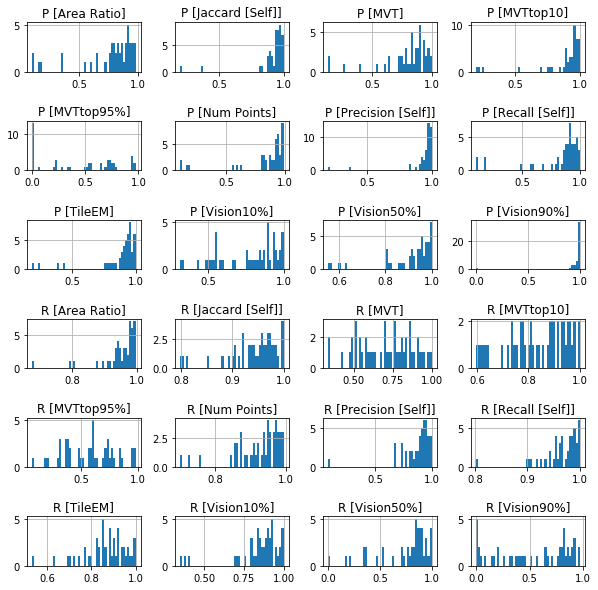

In [41]:
d = batch_all_data.hist(figsize=(10,10),bins=50,layout=(6,4))#,sharex=True)#,sharey=True)
plt.subplots_adjust(hspace=1)

In [42]:
batch_all_data.median()

P [Num Points]          0.923594
R [Num Points]          0.942267
P [Area Ratio]          0.837305
R [Area Ratio]          0.964853
P [Jaccard [Self]]      0.952500
R [Jaccard [Self]]      0.957183
P [Precision [Self]]    0.972620
R [Precision [Self]]    0.916468
P [Recall [Self]]       0.908989
R [Recall [Self]]       0.978496
P [Vision10%]           0.841361
R [Vision10%]           0.883943
P [Vision50%]           0.949111
R [Vision50%]           0.848319
P [Vision90%]           0.987567
R [Vision90%]           0.653206
P [TileEM]              0.933262
R [TileEM]              0.882404
P [MVT]                 0.849587
R [MVT]                 0.729623
P [MVTtop10]            0.952162
R [MVTtop10]            0.860142
P [MVTtop95%]           0.541380
R [MVTtop95%]           0.599674
dtype: float64

median increase by 1% when bad vtiles are dropped 

In [43]:
batch_all_data.std()

P [Num Points]          0.233364
R [Num Points]          0.066825
P [Area Ratio]          0.238419
R [Area Ratio]          0.059294
P [Jaccard [Self]]      0.144168
R [Jaccard [Self]]      0.049265
P [Precision [Self]]    0.146285
R [Precision [Self]]    0.148215
P [Recall [Self]]       0.234328
R [Recall [Self]]       0.036169
P [Vision10%]           0.196418
R [Vision10%]           0.145311
P [Vision50%]           0.113982
R [Vision50%]           0.243901
P [Vision90%]           0.144951
R [Vision90%]           0.340184
P [TileEM]              0.183705
R [TileEM]              0.098903
P [MVT]                 0.202136
R [MVT]                 0.173788
P [MVTtop10]            0.193206
R [MVTtop10]            0.116806
P [MVTtop95%]           0.352071
R [MVTtop95%]           0.224059
dtype: float64

In [44]:
batch_all_data.mean()

P [Num Points]          0.830325
R [Num Points]          0.922677
P [Area Ratio]          0.762693
R [Area Ratio]          0.948449
P [Jaccard [Self]]      0.915720
R [Jaccard [Self]]      0.942320
P [Precision [Self]]    0.932376
R [Precision [Self]]    0.869936
P [Recall [Self]]       0.820898
R [Recall [Self]]       0.965279
P [Vision10%]           0.769836
R [Vision10%]           0.849498
P [Vision50%]           0.907617
R [Vision50%]           0.753315
P [Vision90%]           0.961160
R [Vision90%]           0.529287
P [TileEM]              0.872202
R [TileEM]              0.865067
P [MVT]                 0.793550
R [MVT]                 0.707197
P [MVTtop10]            0.875766
R [MVTtop10]            0.835544
P [MVTtop95%]           0.446568
R [MVTtop95%]           0.576329
dtype: float64

dropping bad vtile objects doesn't actually increase the PR by a lot, this is probably because these are probably not included in the first place cuz they would have probably caused the TileEM to fail anyways 

In [ ]:
1,40,41

In [48]:
batch_all_data

,P [Num Points],R [Num Points],P [Area Ratio],R [Area Ratio],P [Jaccard [Self]],R [Jaccard [Self]],P [Precision [Self]],R [Precision [Self]],P [Recall [Self]],R [Recall [Self]],...,P [Vision90%],R [Vision90%],P [TileEM],R [TileEM],P [MVT],R [MVT],P [MVTtop10],R [MVTtop10],P [MVTtop95%],R [MVTtop95%]
object_id,,,,,,,,,,,,,,,,,,,,,
1,0.182729,0.968021,0.179577,0.972222,0.193073,0.965265,0.193108,0.961796,0.184232,0.980295,...,0.996710,0.096750,0.184436,0.851555,0.133980,0.334598,0.196720,0.834711,0.222087,0.834122
2,0.825657,0.972477,0.800277,0.986742,0.911155,0.975304,0.911155,0.975304,0.816584,0.989421,...,0.987084,0.852688,0.820659,0.852188,0.533115,0.515594,0.696326,0.735680,0.000000,0.355909
3,0.923594,0.935755,0.916533,0.938600,0.955928,0.939842,0.970744,0.898608,0.935912,0.941363,...,0.983052,0.203662,0.949610,0.900054,0.937414,0.918308,0.953901,0.887595,0.000000,0.405490
4,0.932753,0.942267,0.777413,0.940895,0.952502,0.948558,0.963825,0.923540,0.917855,0.956474,...,0.978059,0.326715,0.952590,0.903921,0.931355,0.910965,0.968556,0.884084,0.728178,0.752843
5,0.947324,0.872555,0.893422,0.918138,0.947542,0.906672,0.972119,0.859216,0.912015,0.925719,...,0.966698,0.452409,0.955447,0.855504,0.943256,0.885157,0.965827,0.809375,0.779631,0.705776
6,0.831813,0.886970,0.783578,0.943893,0.891036,0.937740,0.954464,0.815117,0.815478,0.953149,...,0.953203,0.378727,0.879174,0.771339,0.834186,0.818417,0.902092,0.756939,0.728217,0.588478
7,0.868254,0.701157,0.868491,0.794385,0.890214,0.801536,0.913767,0.679310,0.890214,0.801536,...,0.998488,0.035358,0.902207,0.628658,0.811467,0.554976,0.903386,0.607345,0.281271,0.385274
8,0.630675,0.728979,0.591388,0.804409,0.883984,0.851338,0.928462,0.730372,0.753257,0.902064,...,0.986865,0.826123,0.816406,0.702567,0.651127,0.600512,0.878552,0.633513,0.951785,0.607341
9,0.965991,0.950346,0.958174,0.957496,0.985096,0.959575,0.992130,0.910636,0.976625,0.960366,...,0.990545,0.827208,0.986641,0.923375,0.970634,0.949899,0.985453,0.912542,0.772445,0.733034


# Filtering hard tasks 

In [87]:
batch_all_data=pd.read_csv("all_sample5_PR.csv")

In [88]:
task_ambiguity = [1,4,35,40,41,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]
lossless_vtiles=[ 5,  6,  8,  9, 14, 15, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30,33, 35, 37, 46] #  with decent looking vtiles 
all_hard_tasks = list(set(np.concatenate((task_ambiguity,small_area,high_numPts))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]
selected_objids = [objid  for objid in easy_tasks if objid not in lossless_vtiles]

NumPoints fails to distinguish between workers who draw speicfic overbounding BBs (using more points) versus workers who draw detailed BB on the object

#### for non-ambguous tasks

In [90]:
filtered_df = batch_all_data[batch_all_data.index.isin(task_ambiguity)]
filtered_df.mean()

object_id               28.166667
P [Num Points]           0.793187
R [Num Points]           0.925290
P [Area Ratio]           0.765231
R [Area Ratio]           0.948564
P [Jaccard [Self]]       0.923884
R [Jaccard [Self]]       0.914372
P [Precision [Self]]     0.944806
R [Precision [Self]]     0.757318
P [Recall [Self]]        0.776106
R [Recall [Self]]        0.952570
P [Vision10%]            0.731590
R [Vision10%]            0.829591
P [Vision50%]            0.938506
R [Vision50%]            0.683968
P [Vision90%]            0.983227
R [Vision90%]            0.591083
P [TileEM]               0.850459
R [TileEM]               0.774786
P [MVT]                  0.754170
R [MVT]                  0.619761
P [MVTtop10]             0.836976
R [MVTtop10]             0.720540
P [MVTtop95%]            0.414925
R [MVTtop95%]            0.425671
dtype: float64

### for easy tasks

In [75]:
filtered_df = batch_all_data[batch_all_data.index.isin(easy_tasks)]
filtered_df.mean()

P [Num Points]          0.912675
R [Num Points]          0.931671
P [Area Ratio]          0.859704
R [Area Ratio]          0.947570
P [Jaccard [Self]]      0.957191
R [Jaccard [Self]]      0.955387
P [Precision [Self]]    0.971050
R [Precision [Self]]    0.900718
P [Recall [Self]]       0.913975
R [Recall [Self]]       0.968687
P [Vision10%]           0.792227
R [Vision10%]           0.868776
P [Vision50%]           0.921368
R [Vision50%]           0.792832
P [Vision90%]           0.947794
R [Vision90%]           0.615792
P [TileEM]              0.936431
R [TileEM]              0.887988
P [MVT]                 0.849355
R [MVT]                 0.701452
P [MVTtop10]            0.939723
R [MVTtop10]            0.859819
P [MVTtop95%]           0.464975
R [MVTtop95%]           0.599091
dtype: float64

### for hard tasks

In [76]:
filtered_df = batch_all_data[batch_all_data.index.isin(all_hard_tasks)]
filtered_df.mean()

P [Num Points]          0.697648
R [Num Points]          0.908187
P [Area Ratio]          0.606398
R [Area Ratio]          0.949863
P [Jaccard [Self]]      0.848905
R [Jaccard [Self]]      0.921269
P [Precision [Self]]    0.870067
R [Precision [Self]]    0.820342
P [Recall [Self]]       0.670941
R [Recall [Self]]       0.959789
P [Vision10%]           0.733763
R [Vision10%]           0.818438
P [Vision50%]           0.885465
R [Vision50%]           0.689650
P [Vision90%]           0.982694
R [Vision90%]           0.389919
P [TileEM]              0.768722
R [TileEM]              0.828139
P [MVT]                 0.703642
R [MVT]                 0.716454
P [MVTtop10]            0.772725
R [MVTtop10]            0.796435
P [MVTtop95%]           0.416911
R [MVTtop95%]           0.539658
dtype: float64

Tile based approaches perform much better in precision in hard tasks 

### Both Num Points and Area ratio are somewhat recall heavy, they don't work as well when the task is ambiguous

In [423]:
filtered_df = batch_all_data[batch_all_data.index.isin(task_ambiguity)]
filtered_df.mean()

P [Num Points]          0.691578
R [Num Points]          0.932882
P [Area Ratio]          0.602137
R [Area Ratio]          0.946138
P [Jaccard [Self]]      0.864062
R [Jaccard [Self]]      0.935826
P [Precision [Self]]    0.879216
R [Precision [Self]]    0.836075
P [Recall [Self]]       0.699307
R [Recall [Self]]       0.975338
P [Vision10%]           0.826202
R [Vision10%]           0.873318
P [Vision50%]           0.885197
R [Vision50%]           0.829571
P [Vision90%]           0.983919
R [Vision90%]           0.540140
P [TileEM]              0.783069
R [TileEM]              0.852922
P [MVT]                 0.714999
R [MVT]                 0.704367
P [MVTtop10]            0.790220
R [MVTtop10]            0.829677
P [MVTtop95%]           0.512144
R [MVTtop95%]           0.622836
dtype: float64

# Examining Good and bad workers 

In [390]:
# from tabulate import tabulate
# print [list(precision_df.mean().as_matrix()),list(recall_df.mean().as_matrix())]
# tbl = pd.DataFrame([list(precision_df.mean().as_matrix()),list(recall_df.mean().as_matrix())],columns=precision_df.keys(),index=["Precision","Recall"])
# tbl

### list of bugs and to-dos

- ~~lots of precision = -1 and r=0 in P [MVTtop95%]~~
 - when len(tidx)==0, no tiles satisfy the constraint, then P,R=0
- ~~precision and recall values above 1 for some metric? (look at the histogram)~~ 
    - (Fixed)
- look at worker qualities (good/bad workers), if more bad worker in sample, would tile based approach be better? 
- ~~if objects (task) hard/ambiguous then how do they do ?~~
- ~~filter out objects with bad vtiles~~

- TileEM: look at individual workers 
- look at any T' that are better 
